# INN Hotels Project
## Learner: David Muturi
## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [133]:
# install missing library - black
from google.colab import drive
drive.mount("/content/drive")
!pip install black[jupyter]

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00


In [135]:
!black '/content/drive/MyDrive/Colab Notebooks/Project_SLC_DSBA_INNHotels_FullCode_DM.ipynb'

reformatted /content/drive/MyDrive/Colab Notebooks/Project_SLC_DSBA_INNHotels_FullCode_DM.ipynb

All done! ✨ 🍰 ✨
1 file reformatted.


In [2]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

#Import the dataset


In [3]:
# Load data onto google colab
from google.colab import files
import io
# check if data file has been uploaded onto colab if not upload
try:
    uploaded
except NameError:
    uploaded = files.upload()
# Get data from uploaded file
hotel = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))


Saving INNHotelsGroup.csv to INNHotelsGroup.csv


In [4]:
# Make a copy of the dataset
data = hotel.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

###View first 5 and last rows of the dataset

In [5]:
#View 5 top rows
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [6]:
#view last 5 bottom rows
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [7]:
#view dataset shape
data.shape

(36275, 19)

**Observation**

*   There are 36,275 rows and 19 columns




In [8]:
#check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#check for duplicates


In [9]:
#check for duplicates
data.duplicated().sum()

0

**Observation**

There are no duplicates

**Drop booking_id column**


In [10]:
data=data.drop(['Booking_ID'],axis=1)

In [11]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [12]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


### Observations
*  The meal plan Meal Plan 1 has the highest frequency amongst type of meals.
*  The Room type Room_Type1 has the highest frequency amongst rooms booked.
*  Amongst market segment type, online has the highest frequency
*  Booking status not_canceled has the highest frequency tpo


In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on lead time

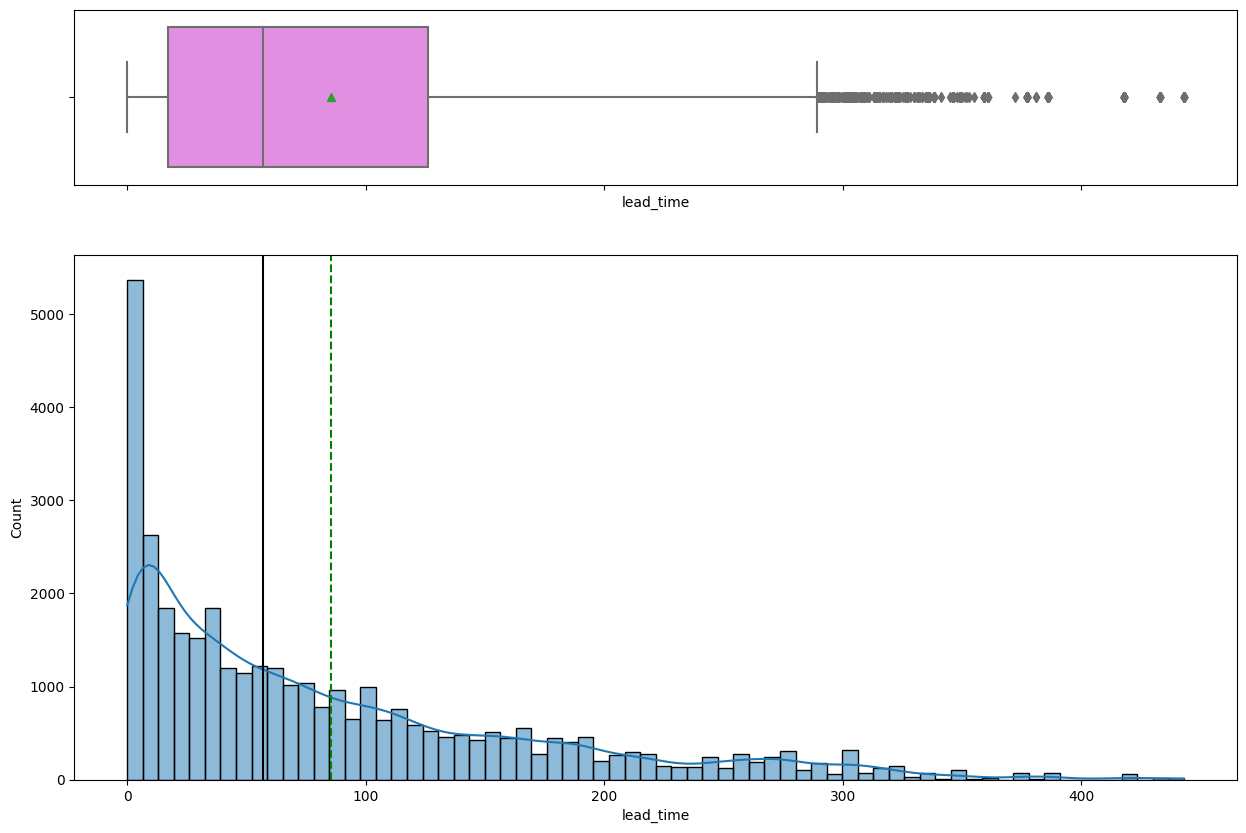

In [14]:
histogram_boxplot(data, "lead_time")

**Observations**

* The mean and median are different
* The distribution of lead time is right skewed
* There are outliers on lead time


### Observations on average price per room

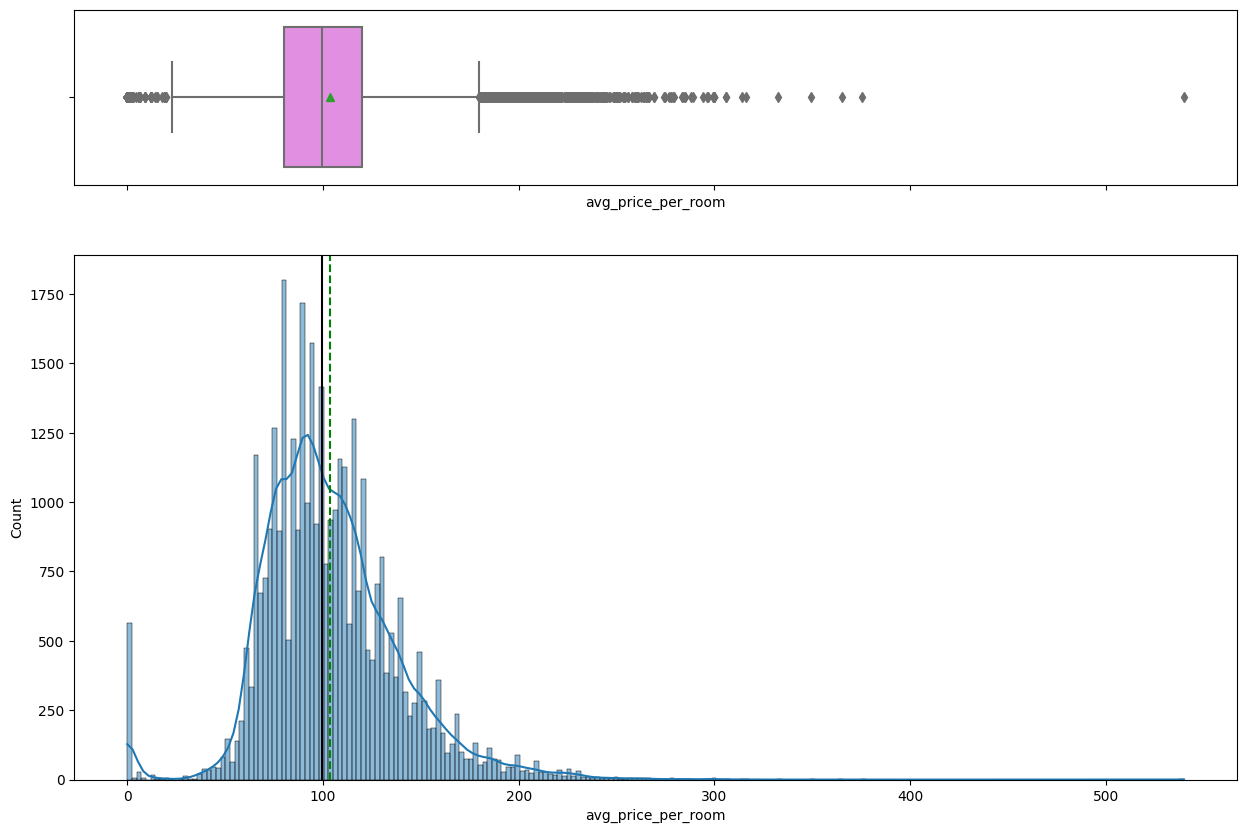

In [15]:
histogram_boxplot(data,"avg_price_per_room")



*   There are outliers on average price per room
*   The mean and median are almost the same
*   The average price per room is a normal distribution



In [16]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


**Observation**

There are 545 records where average price per room is zero

In [17]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations**

The market segments complementary and Online bookings are the ones with zero average price per room

In [18]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [19]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Observations on number of previous booking cancellations

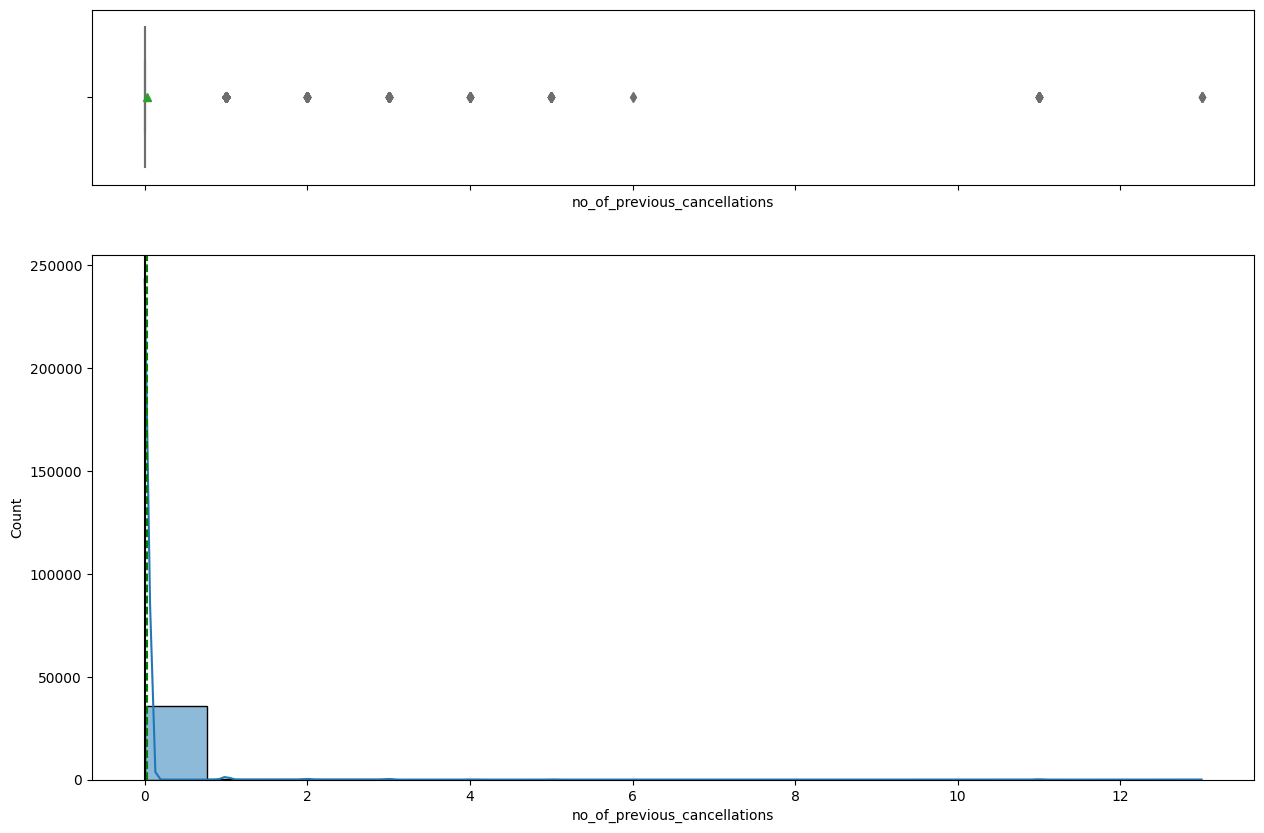

In [20]:
histogram_boxplot(data,"no_of_previous_cancellations")

### Observations
* There are outliers in the number of previous cancellations

* The distribution is skewed to the right 

### Observations on number of previous booking not canceled

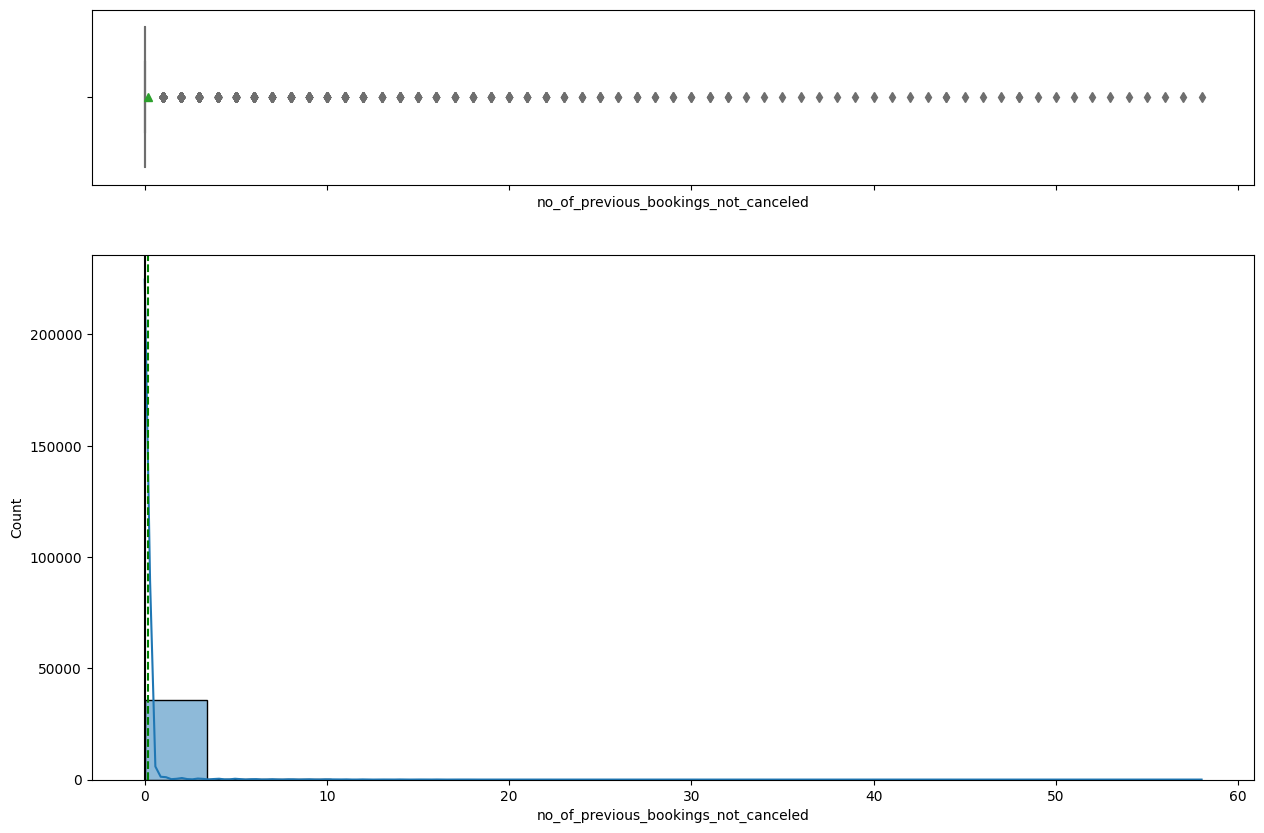

In [21]:
histogram_boxplot(data,"no_of_previous_bookings_not_canceled")

### Observations
* There are outliers in the number of previous previous bookings not cancelled

* The distribution is skewed to the right 

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on number of adults

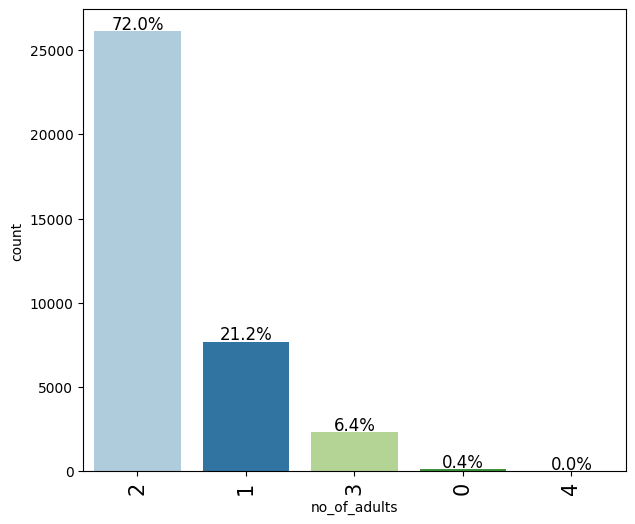

In [23]:
labeled_barplot(data, "no_of_adults", perc=True)

## Observations
* The bookings with 2 adults are the highest at 72%
* The bookings with 4 adults are zero, while those with no adults at all are 0.4%

### Observations on number of children

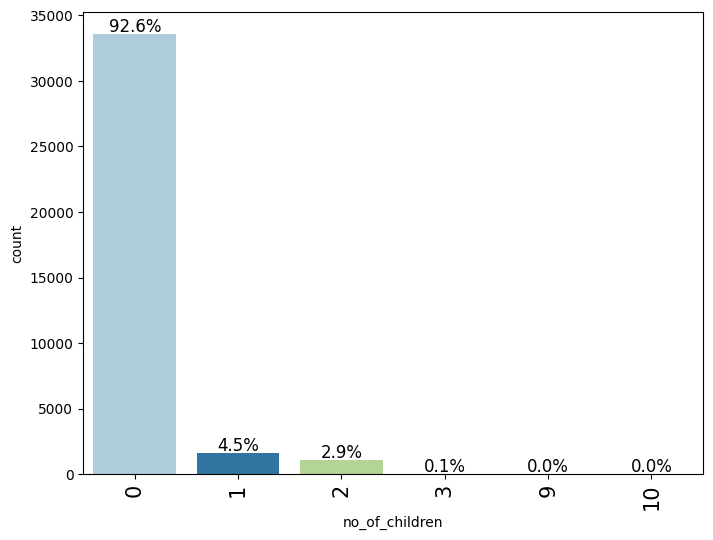

In [24]:
labeled_barplot(data, "no_of_children", perc=True)

## Observations
* The number of bookings with no children is the highest at 92.6%
* There are a few bookings with 9 and 10 children

In [25]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Observations on number of week nights

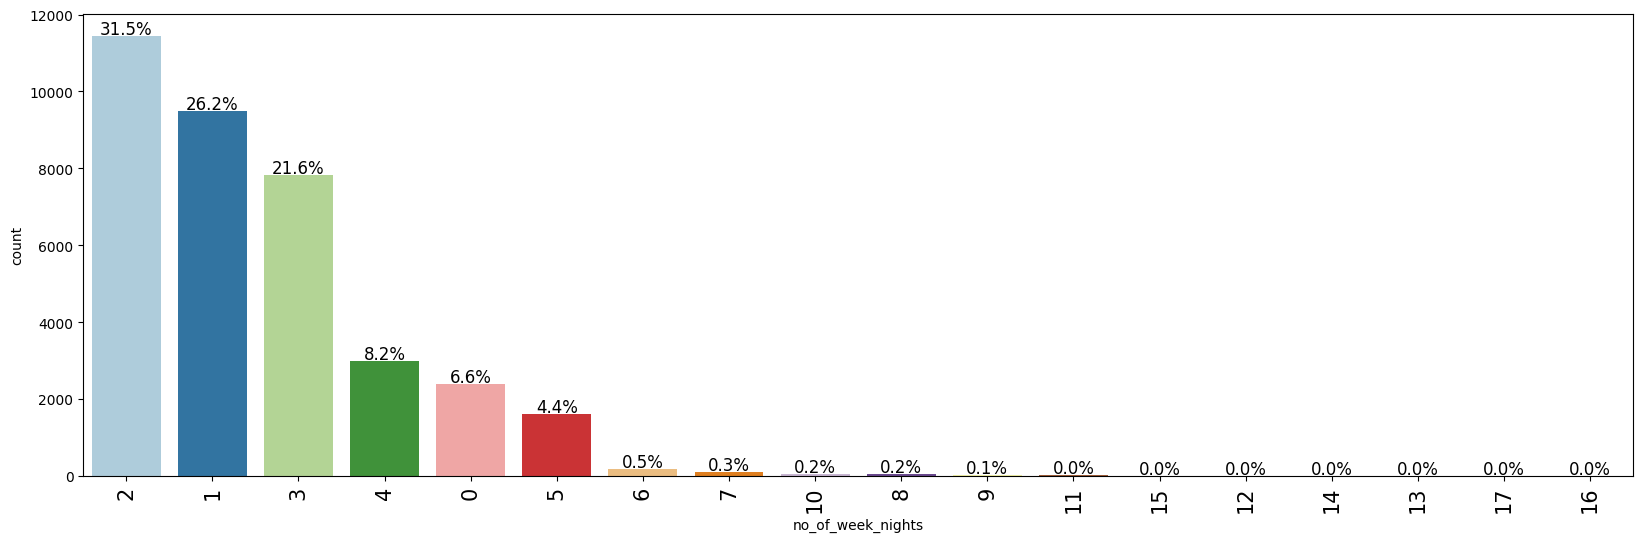

In [26]:
labeled_barplot(data, "no_of_week_nights", perc=True)

##Observations on number of week nights
*  The number of weeknights (2) has the highest frequency at 31% following by one 
weeknigt and 93 weeknights respectively. 

* It seems most people stay on monday to fridays starting with 2 weeks,1 week and 3 weeks.

## Observations on number of weekend nights

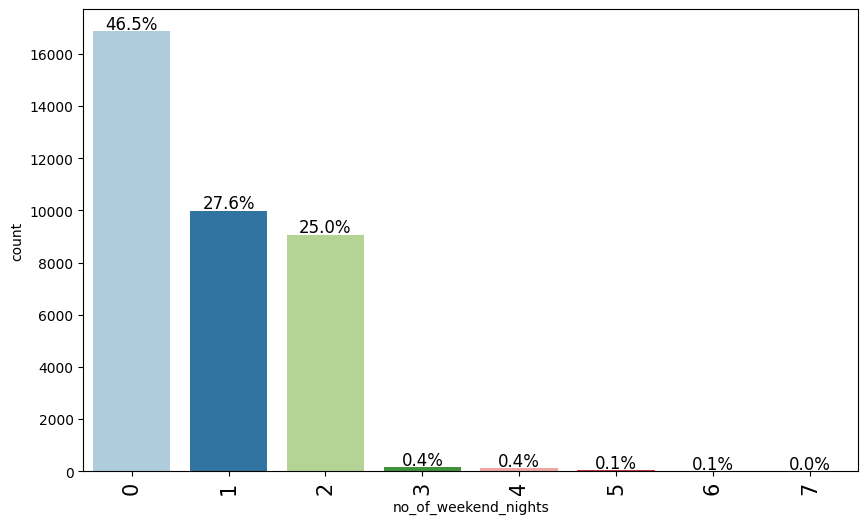

In [27]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)


*   The number of weekend nights with 0 has the highest frequency at 46.5%
*   The number of weekend nights with 1 is second at 27.6% followed by 2 with 25.0%



### Observations on required car parking space

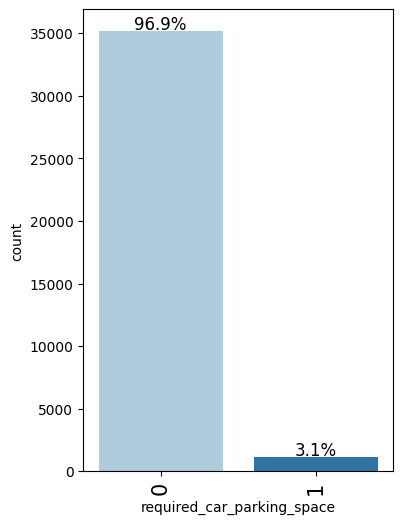

In [28]:
labeled_barplot(data, "required_car_parking_space", perc=True)



*   Majority of the customers do not require parking space at 96.9%
*   The percentage of customers requring parking space is 3.1%



### Observations on type of meal plan

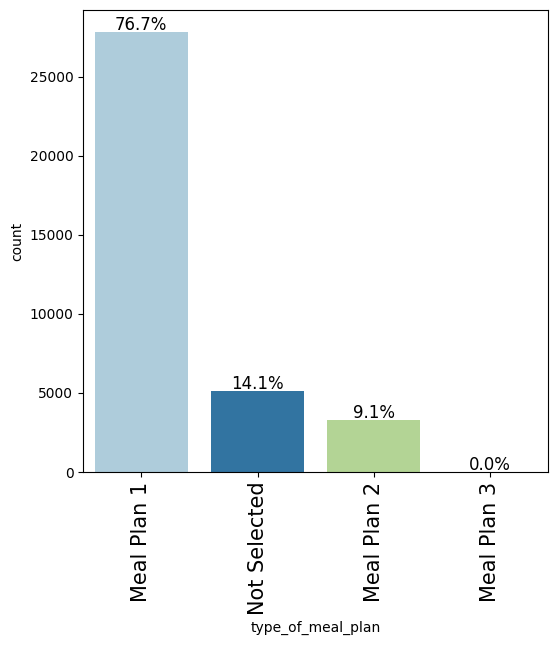

In [29]:
labeled_barplot(data, "type_of_meal_plan", perc=True)


*   The preferred meal plan is meal plan1 has the highest frequency at 76.7%
*   The customers that did not select a meal plan is 14.1%



### Observations on room type reserved

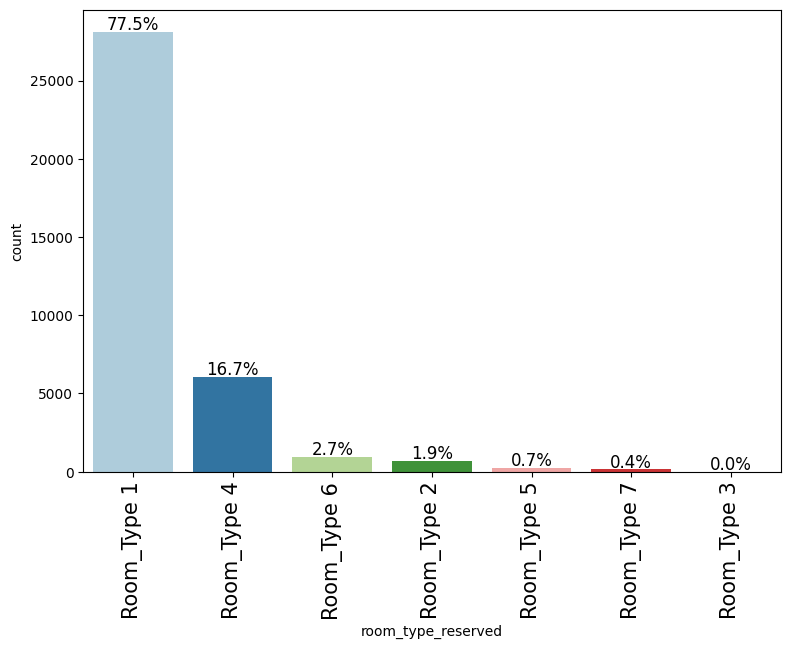

In [30]:
labeled_barplot(data, "room_type_reserved", perc=True)



*   Room_Type 1 is the most selected at 77.%% 
*   Room_Type 4 is the second most at 16.7%
*   The least selected room type is Room_Type 3



### Observations on arrival month
**What are the busiest months in the hotel?**

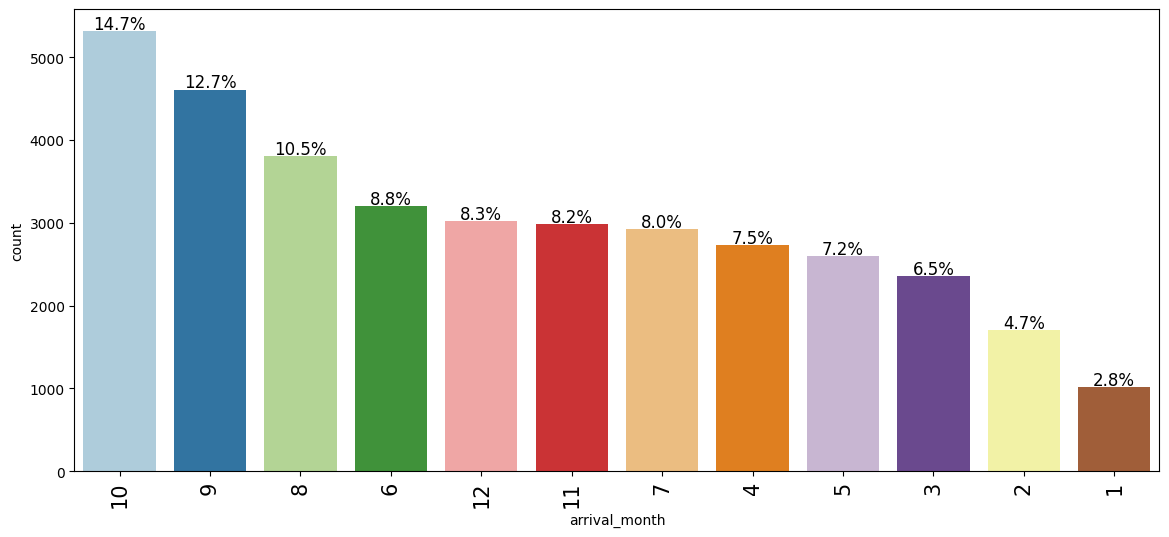

In [31]:
labeled_barplot(data, "arrival_month", perc=True)


*   It seems most preferred arrival month is 10 at 14.7%
*   The second most preferred arrival month is 9 at 12.7% followed by 8 at 12.7%
*   The least preferred month is 1 at 2.8%
*   The top 3 busiest months are from august,september and October



### Observations on market segment type
**Which market segment do most of the guests come from?**

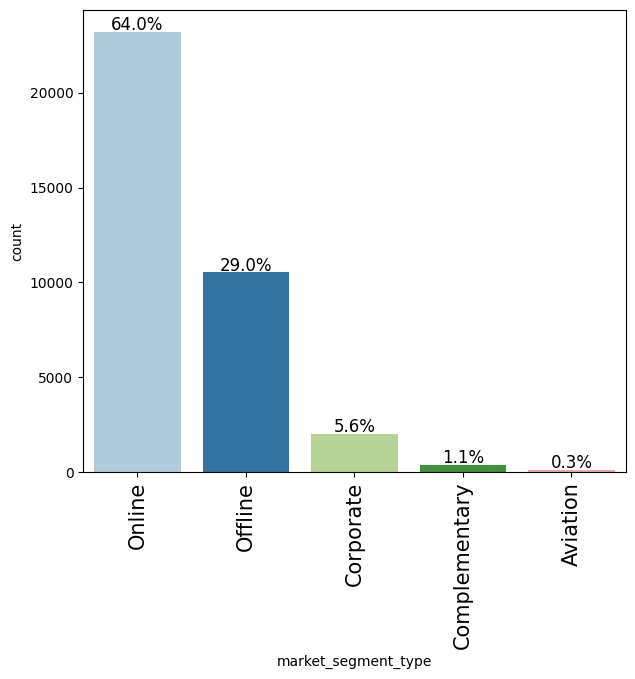

In [32]:
labeled_barplot(data, "market_segment_type", perc=True)

* Online market segment is the highest at 64%
* Offline is second at 29.0%.
* Aviation is the lowest segment at 0.3%
* Most guests come from the Online segment

### Observations on number of special requests

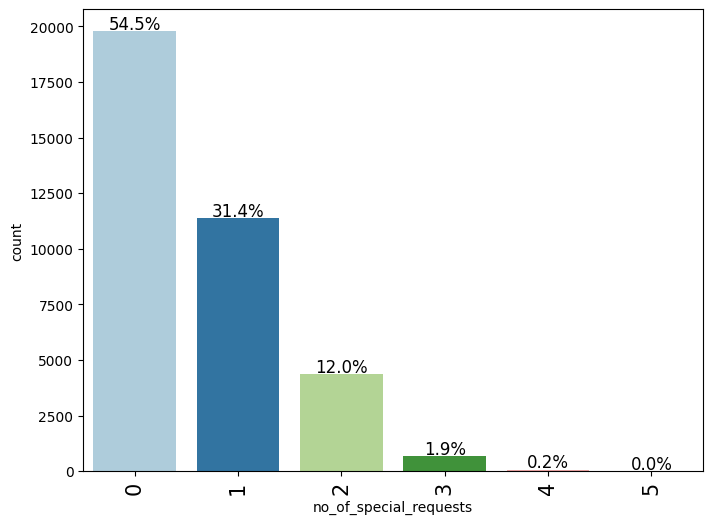

In [33]:
labeled_barplot(data, "no_of_special_requests", perc=True)


* ZERO number of special requests is highest at 54.5%
* Customers with 1 special requests are second at 31.4% followed by 2 special requests at 1.9%
* The customers with 5 special requests are 0.0%

### Observations on booking status
**What percentage of bookings are canceled?**

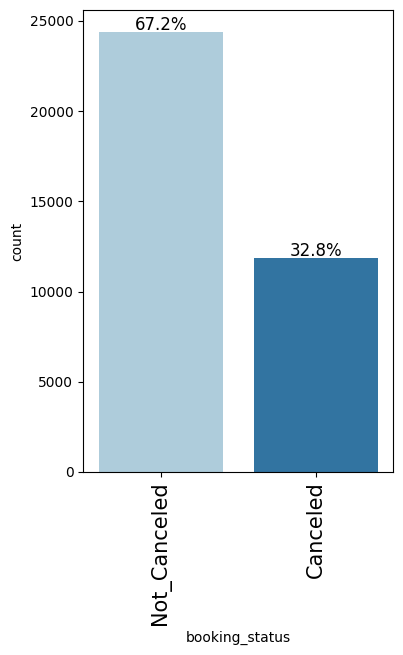

In [34]:
labeled_barplot(data, "booking_status", perc=True)

*  67.2% of bookings are not canceled.
*  **32.8% of bookings are canceled.**


**Change cancelled bookings to 1 and no cancelled bookings to 0 for further analysis**

In [35]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

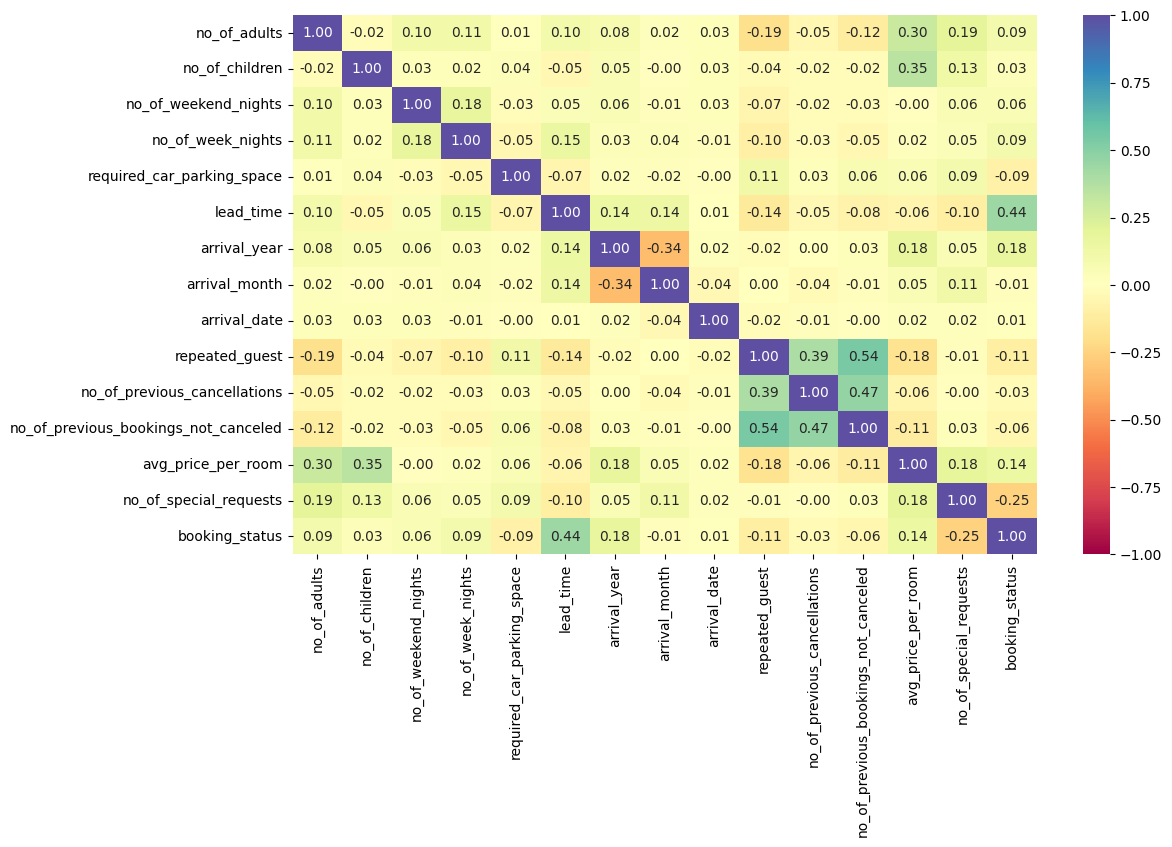

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The correlation betweeen no_of_previous_bookings_not_canceled and repeated_guest is the highest at 0.54
* Another positive correlation is between no_previous_cancellations and no_of_previous_bookings_not_canceled at 0.47
* Lead time and booking status also has a positive correlation with booking status at 0.44
* The correlation between repeated_guest and no_of_previous cancellations though not high is positive at 0.39
* Other noted positive correlation is between no_of_children and average price per room and no_of adults vs average price per room.
* Other notable positive correlations are between avg_per_room and booking status and avg_per_room and no_of_special requests
* The least negative correlation is between arrival month and arrival year


In [37]:
## function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [38]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

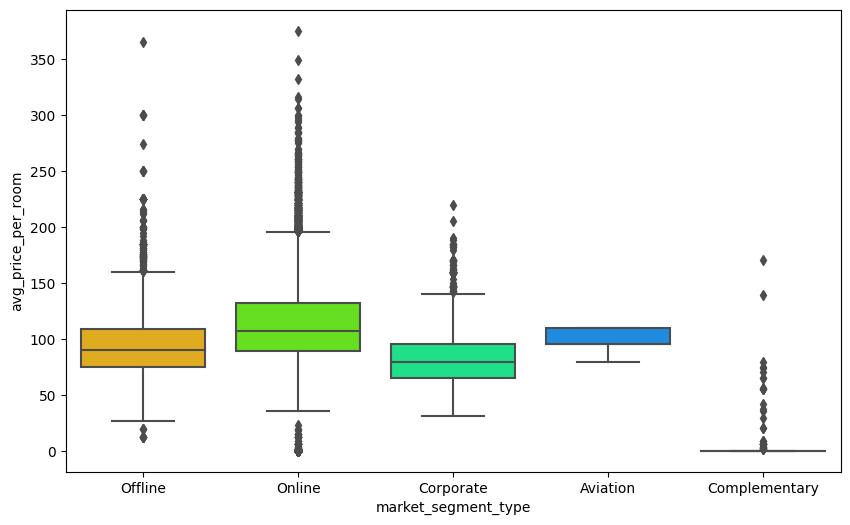

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Online market segmment has a higher average price per room compared to other segments
* Corporate market segment has the 4th lowest average price per room
* There are outliers on average price per room for all market segments apart from the aviation segment.
* Most of the complementary segment average price per room is zero however there are outliers.

**How does booking status varies across different market segments. Also, how does average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


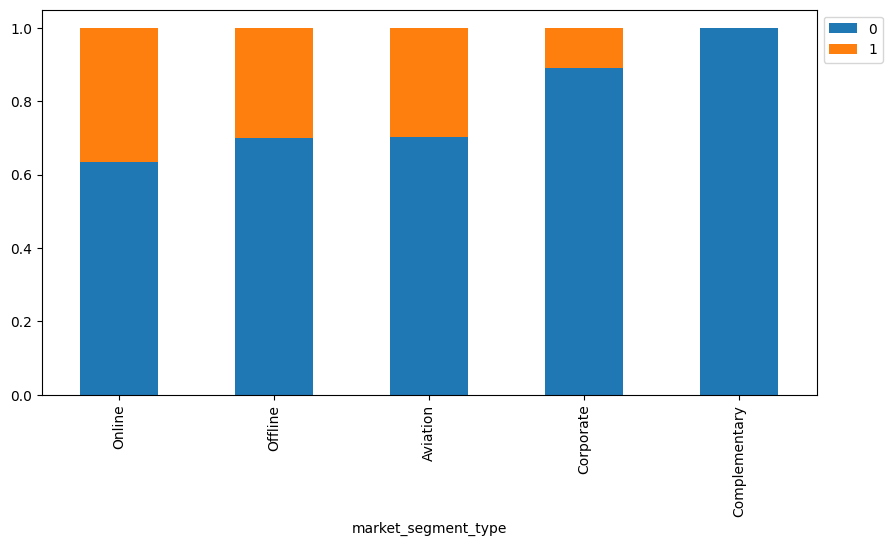

In [40]:
stacked_barplot(data, "market_segment_type", "booking_status")

## Observations
* Online market segment has the highest proportion of cancellations.
* offline and aviation seem to have the same proportion of cancellations, although the aviation segment has least bookings in terms of absolute numbers.
* Amongst the top 4, corporate segment has the least proportion of cancellations.
* Complementary has zero cancellations and this is expected.

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**


booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


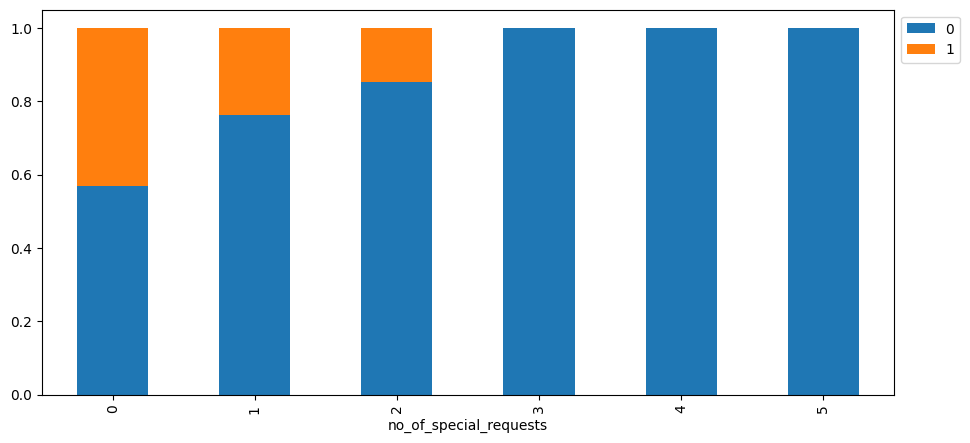

In [41]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

## Observations
* Bookings with zero special requests has the highest proportion of cancellations
* Bookings with one special request is second and that with 2 special requests is third
* Bookings with 3 or more special requests has no cancellations

**Do the special requests made by the customers impact the prices of a room?**

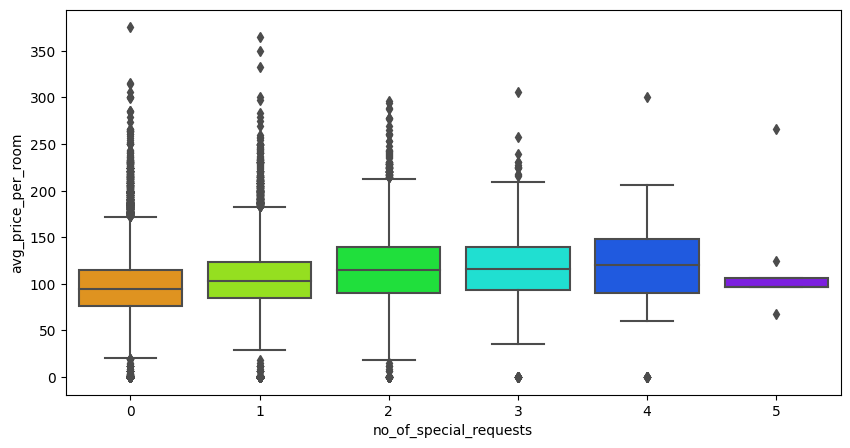

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow") 
plt.show()

##Observations
* The bookings with 0 special requests have a lower avg_price_per_room 
* The avg_price_per_room increases gradually between bookings with 2-4 special requests
*  There are outliers across all bookings on the avg_price_per_room regardless of the number of special requests

## Analysis between booking status and average price per room

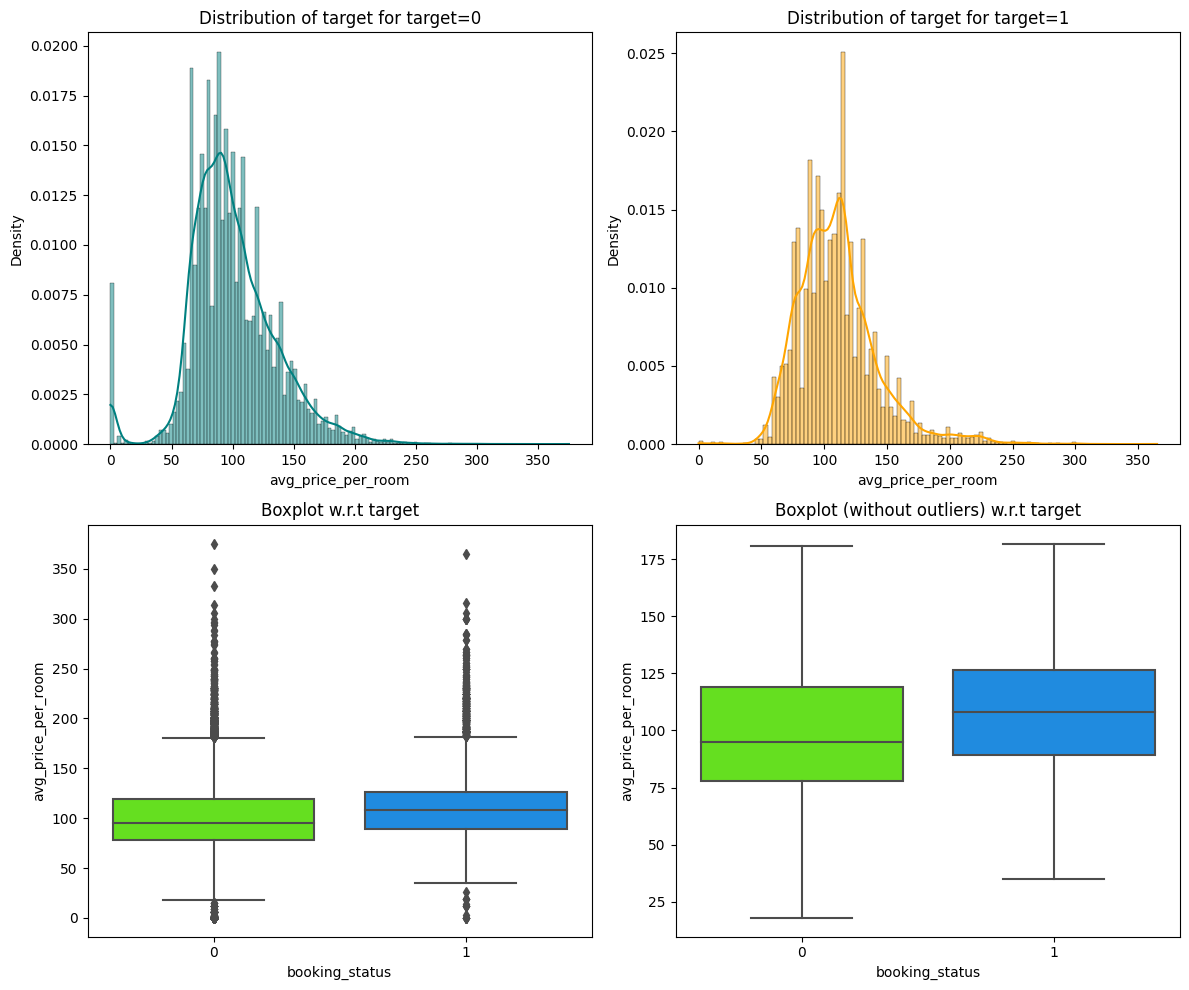

In [43]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

## Observations

*   The avg_price_per_room for bookings not cancelled follows a normal distribution
*   The avg_price_per_room for cancelled bookings also has a normal distribution
*   There are outliers on avg_price_per_room with for both cancelled and non-cancelled bookings
*   The avg_price_per_room is higher for cancelled bookings as compared to those not cancelled.



**Analysis betweeen booking status and lead time**

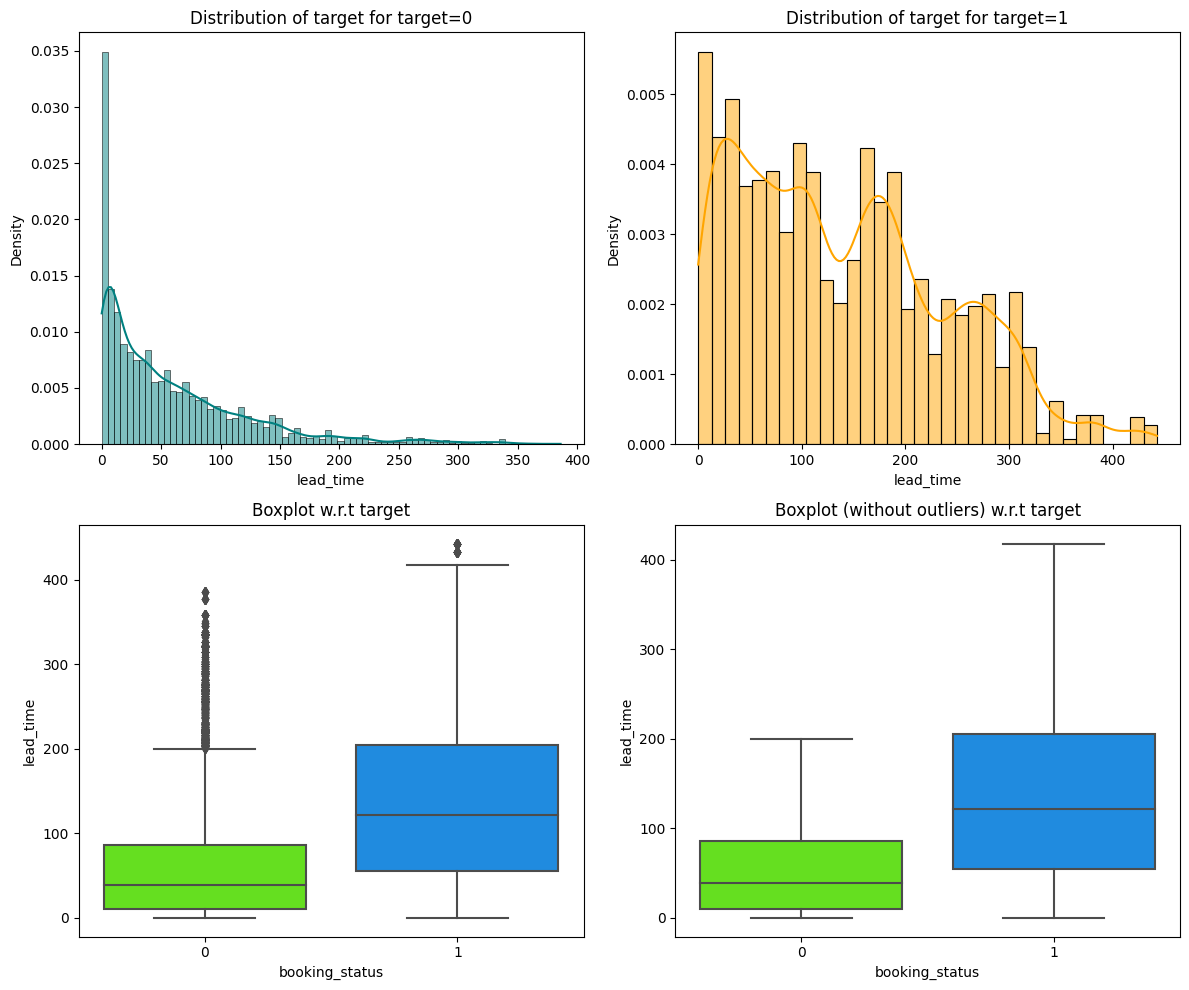

In [44]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

## Observations
* The lead_time distributions for both cancelled and non_cancelled bookings is right skewed
* The lead time for non-cancelled bookings is less than the lead time for cancelled bookings
* There are outliers on lead time for both cancelled and non-cancelled bookings.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [45]:
#create separate data frame of families
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [46]:
#add new attribute to family data frame to hold total no. of family members
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


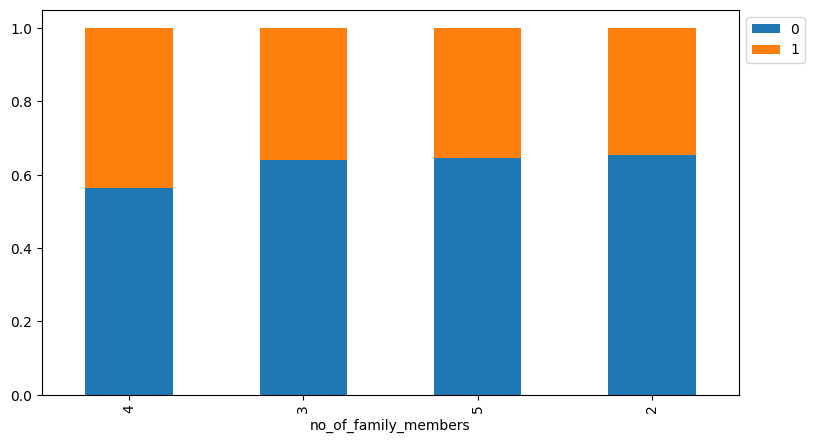

In [47]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

## Observations
* The bookings with 4 family members have the highest proportion of cancellations.
* Bookings with 2,3 and 5 seem to have the same proportion of cancellations.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [48]:
#Create separate dataset 
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [49]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

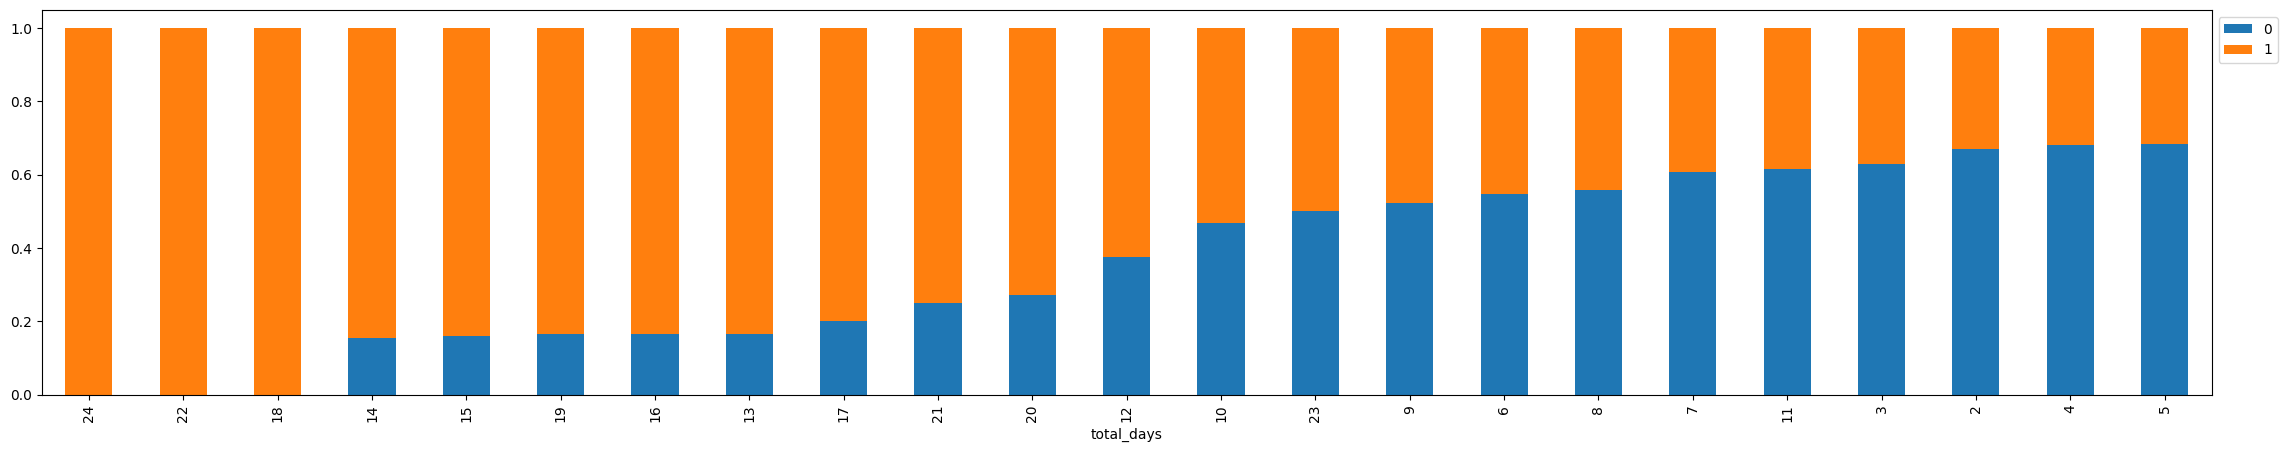

In [50]:
stacked_barplot(stay_data, "total_days", "booking_status")

## Observations
* Generally bookings which have longer stay days have a higher proportion of cancellations.
* People with 5,4 and 2 stay days at the hotel have the least proportion of cancellations

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0     1    All
repeated_guest                    
All             10979  6115  17094
0               10812  6108  16920
1                 167     7    174
------------------------------------------------------------------------------------------------------------------------


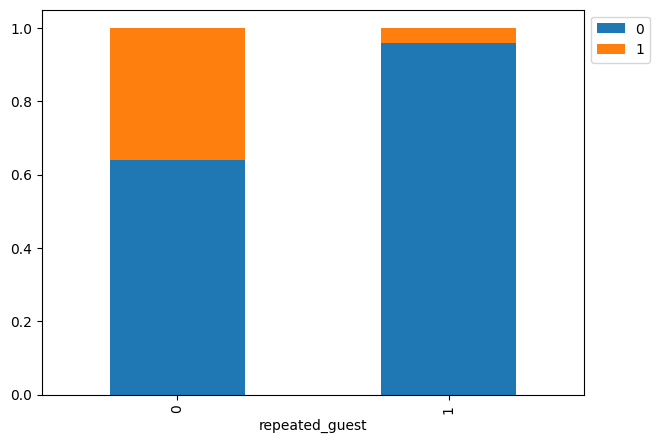

In [51]:
# Plot stacked bar chart
stacked_barplot(stay_data, "repeated_guest", "booking_status")

## Observations
* Repeat guests have the lowest number of canceled bookings

**what are the busiest months in the hotel.**

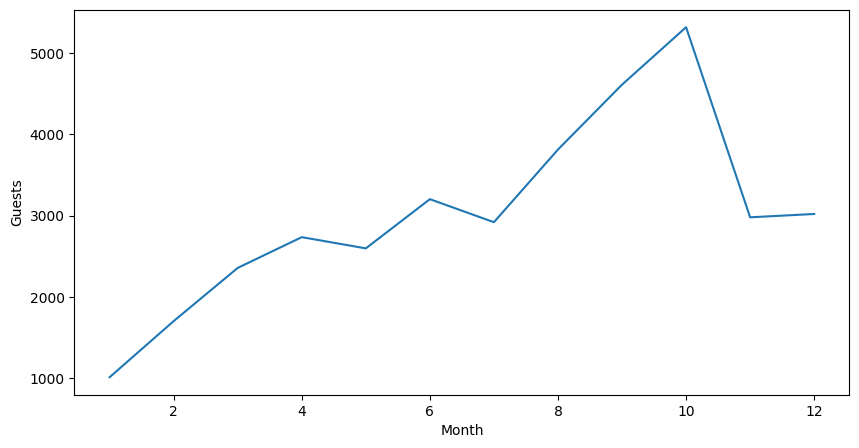

In [52]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

#Observations
* There is a gradual increase in bookings from month 2 to 10 before a sudden dip/fall in bookings.
* October(assuming month 10 is oct)  has the highest number of bookings

##  percentage of bookings canceled in each month.

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


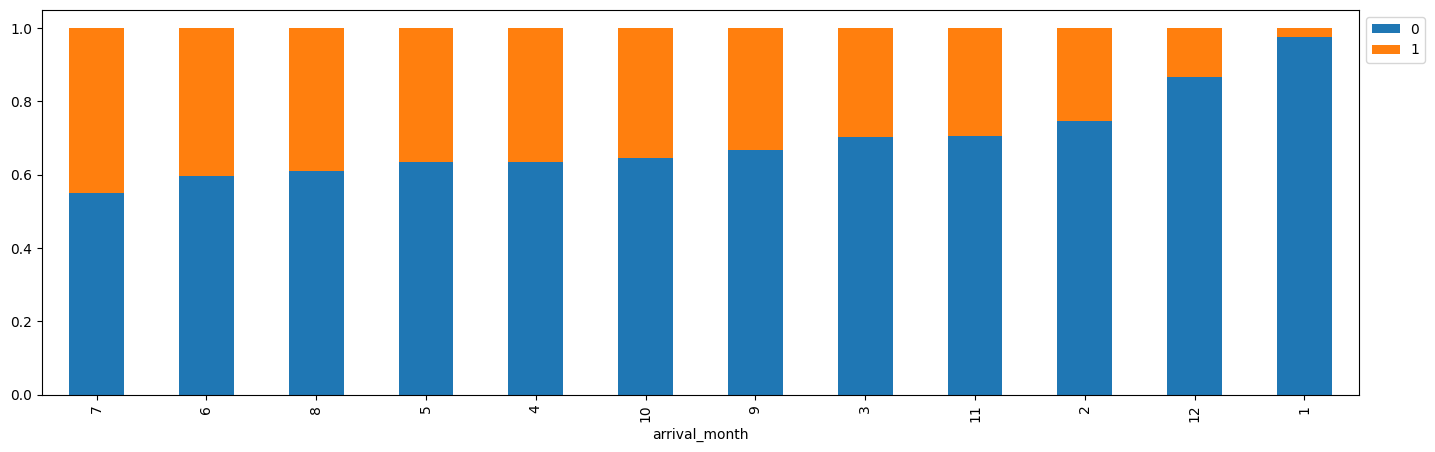

In [53]:
#plotting stacked bar chart of month and booking status
stacked_barplot(data, "arrival_month", "booking_status")

##Observations
* January /month1 has the fewest bookings as well as proportion of cancelled bookings
* Months with more bookings tend to have a higher proportion of cancelled bookings

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [54]:
#check for missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#Observations
* There are no missing values

##Outlier detection

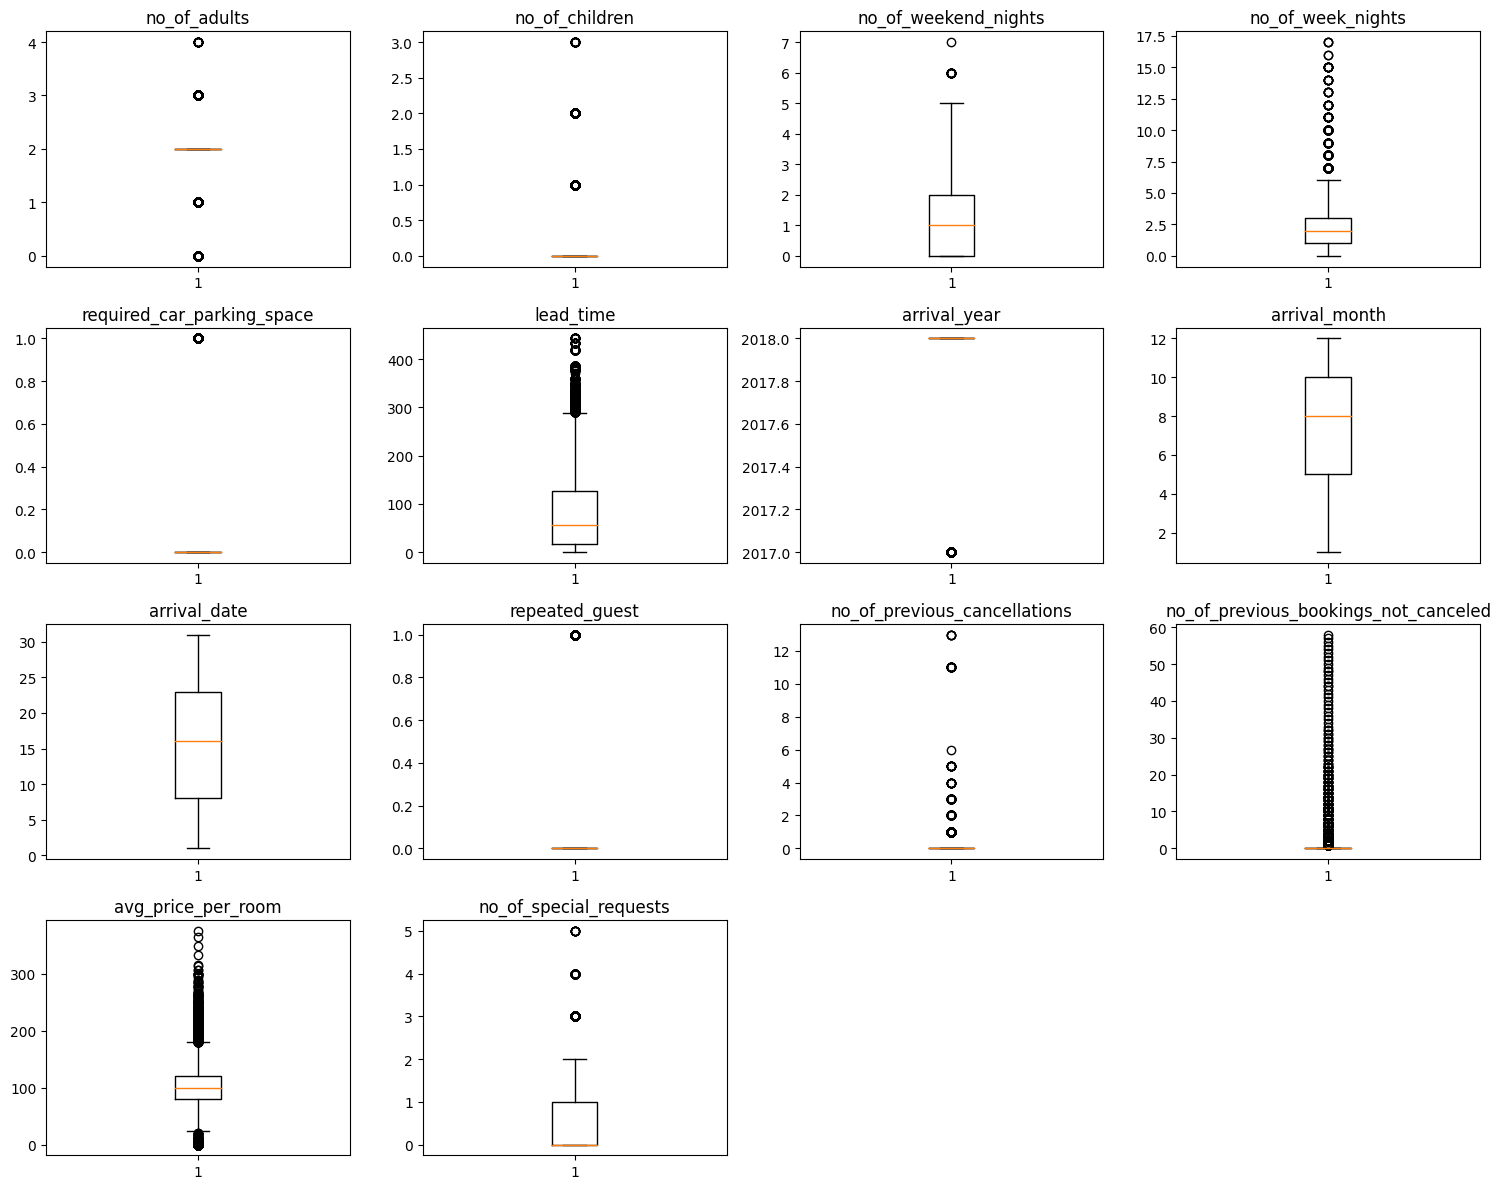

In [55]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Observations
* Apart from arrival date and month all the rest of the attributes have outliers. Since these are proper values, they will not be dropped

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Statistical summary of the dataset

In [56]:
## statistical summary of the data set
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10476,0.39466,0.00000,0.00000,0.00000,0.00000,3.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


* Meal plan1 and Room type 1 have the highest frequencies
* Online market segment seems to be the most common segment 

## Model Building
### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### Create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [59]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


In [60]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### Building Logistic Regression Model

In [61]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3292
Time:                        20:39:27   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

**Observations**
* Negative values of the coefficient show that the probability of a booking being cancelled decreases with the increase of the corresponding attribute value.
* Positive values of the coefficient show that the probability of a booking being cancelled increases with the increase of the corresponding attribute value
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [62]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


**Observations**

* The f1_score of the model is ~0.68 and we will try to maximize it further

* The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [63]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [64]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


**Observations**
* Most attributes apart from market_segment_type_Corporate,market_segment_type_Offline and market_segment_type_Online have a VIF of less than 5.

#### Dropping high p-value variables

In [65]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [66]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]


In [67]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3282
Time:                        20:39:32   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [68]:
print("Training performance:"),
model_performance_classification_statsmodels(lg1,X_train1,y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


* No significant change in model performance

**Observations**
* The attributes that had VIF > 5 (Market segment type) got dropped due to having high P value
* There is no significant change in model performance and we can choose any model to the next steps

* **Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.**

### Coefficient Interpretations

* Coefficient of no_of_adults,no_of_children,no_of_weekend_nights,lead_time,arrival_year,no_of_previous_cancellations, avg_price_per_room and types of meal plan are positive and an increase in these increases chances of cancellations.

* Coefficient of required_car_parking_space,  types of rooms, market segment types, arrival month, repeated_guest, number of special requests are negative increase in these will lead to decrease in chances of cancellations

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [69]:

# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


**Coefficient interpretations**

* **no_of_adults**: Holding all other features constant a 1 unit change in number of adults will increase the odds of a booking being cancelled by  ~1.11 times or ~11.5% increase in odds of a booking being cancelled.

* **no_of_children**: Holding all other features constant, a 1 unit increase in  number of children will increase the odds of a booking being cancelled by appprox 1.17 times  or ~16.5% increase in odds of a booking being cancelled

* **repeated_guest** Holding all other features constant, a 1 unit increase in a customer being a repeat guest wihh increase the odds of a booking being cancelled by ~0.06 times or ~93.5% decrease in odds of a booking being cancelled.
***Interpretation for other attributes can be done similarly.**


## Model performance evaluation

#### Checking model performance on the training set

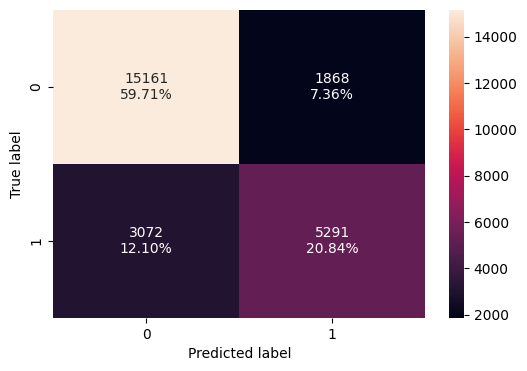

In [70]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [71]:

print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1,y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**Test set performance**

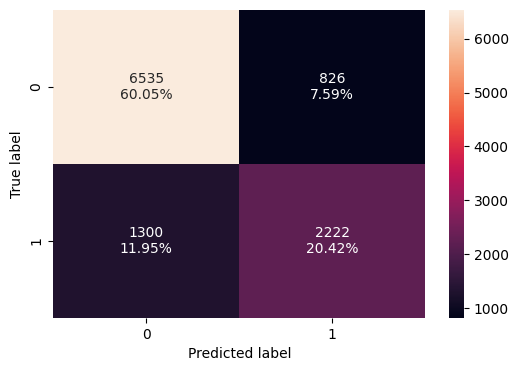

In [72]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [73]:
print("test performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1,y_test)
log_reg_model_test_perf

test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


* The model is giving a good f1_score of ~0.682 and ~0.676 on the train and test sets respectively
* As the train and test performances are comparable, the model is not overfitting
* Moving forward we will try to improve the performance of the model

ROC-AUC on training set

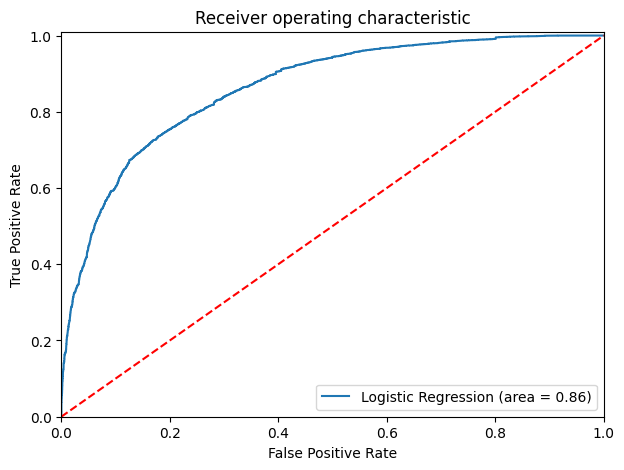

In [74]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [75]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


**Checking model performance on training set**

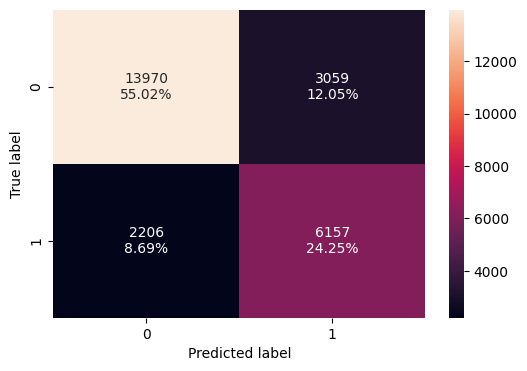

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [77]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


* Recall and F1 score of model have increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

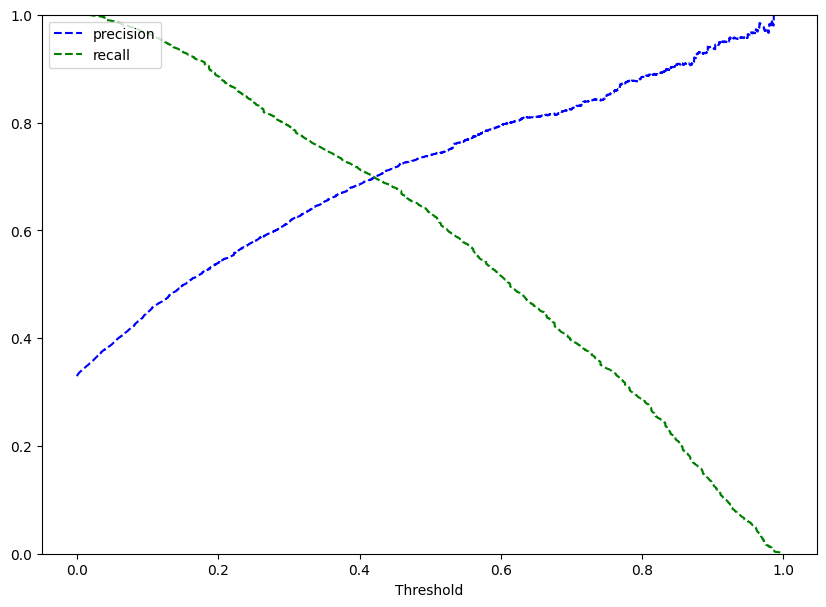

In [78]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [79]:
# setting the threshold
optimal_threshold_curve = 0.42

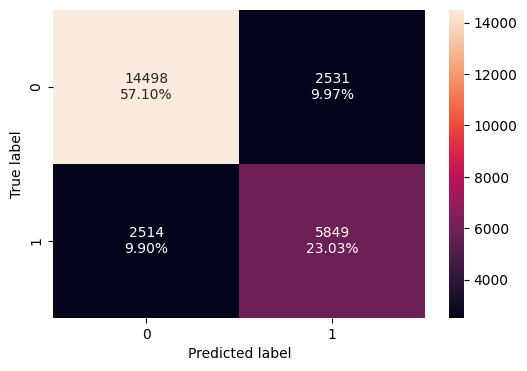

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)

In [81]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


*  Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42

#### Let's check the performance on the test set

**Using model with default threshold**

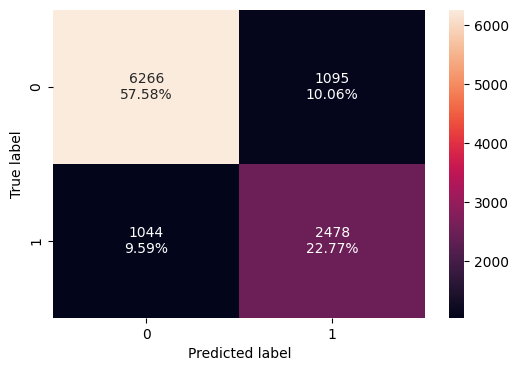

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [83]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


* ROC curve on test set

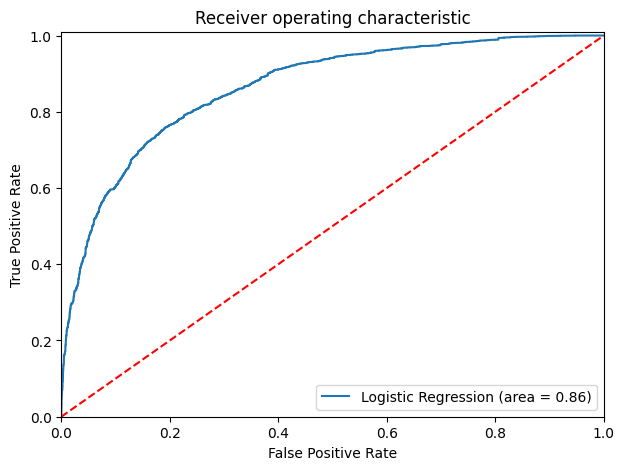

In [84]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

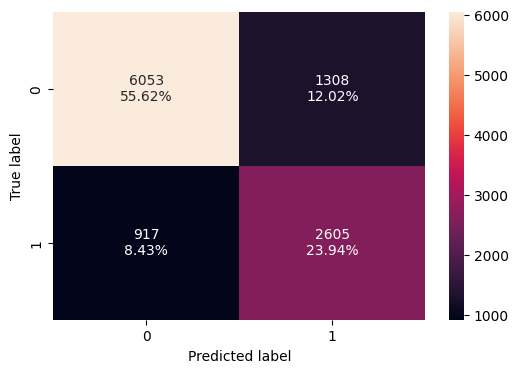

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)

In [86]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


**Using model with threshold = 0.42**

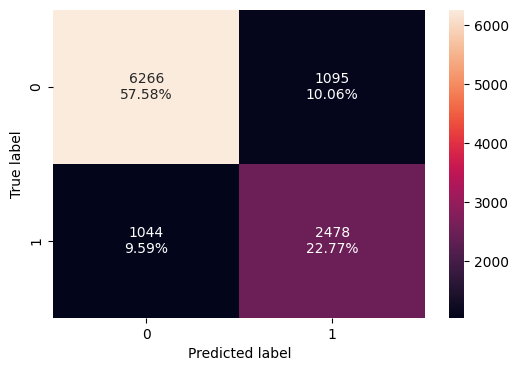

In [87]:
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)

In [88]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


## Final Model Summary

In [89]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [90]:
#test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


## Observations
* Almost all the three models are performing well on both training and test data without the problem of overfitting
The model with a threshold (0.37) is giving the best F1 score. Therefore it can be selected as the final model

### **Conclusions and recommendations**

* We have been able to build a predictive model that can be used by INNS hotels to find the bookings with a likelihood of being cancelled with an f1_score of 0.70 on the training set and help in formulating profitable policies for cancellations and refunds.
* All the logistic regression models have given a generalized performance on the training and test set.
*  Coefficient of no_of_adults,no_of_children,no_of_weekend_nights,lead_time,arrival_year,no_of_previous_cancellations, avg_price_per_room and types of meal plan are positive and an increase in these increases chances of cancellations.

* Coefficient of required_car_parking_space,  types of rooms, market segment types, arrival month, repeated_guest, number of special requests are negative increase in these will lead to decrease in chances of cancellations.

* Inns Hotel should promote bookings with fewer number of adults and no of children as these are less likely to be cancelled.
* Repeat guests are less likely to cancel their bookings and INNS Hotels should probably promote policies that provide incentives to repeat customers.

* Bookings made on weekend nights are likely to have more cancellations than bookings made on week day nights. Inns Hotel should market more week-day nights to increase profitability
* The number of previous cancellations is also an indicator of a likelihood a customer will cancel, the Hotel should focus more on customers with few/no previous cancelled bookings

* Increase in avg_price_per_room will result in cancellations, so Inns Hotel should promote fair market prices to reduce chances of cancellations.

* Increase in lead time is also another factor that leads to possibility of canceled bookings, INNS hotel should promote policies that encourage customers to book closer to their arrival dates.
* Several types of meal plans lead to increased cancellations, INNS hotel should find out why customers prefer certain meal types.

## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Lets convert the columns with an 'object' datatype into categorical variables

In [92]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,1
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55000,1,0
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61000,1,0
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90000,1,0
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44000,3,0


In [93]:
print(data.type_of_meal_plan.value_counts())
print(data.room_type_reserved.value_counts())
print(data.market_segment_type.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


In [94]:
#List of categorical variables to be encoded into numbers
oneHotCols=["type_of_meal_plan","market_segment_type","room_type_reserved"]

In [95]:
data = pd.get_dummies(data,columns=oneHotCols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

**Observations**
* All features are now numeric data types

In [96]:
# separate independent and dependent variables/features

X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)



In [97]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Observations**
* We have see that 67.1% of bookings belong to 0 class (not cancelled) and 32.9% belong to class 1(cancelled) for training data, 67.6% of bookings belong to to 0 class and 32.4% belong to cancelled class for test data.

#### Creating functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [98]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [99]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree Model

In [100]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

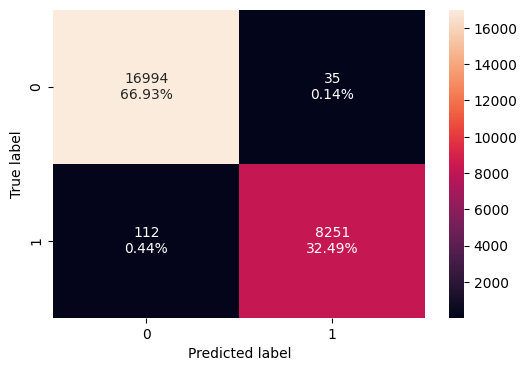

In [101]:
confusion_matrix_sklearn(model,X_train,y_train)

In [102]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


* Model is almost able to  classify all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

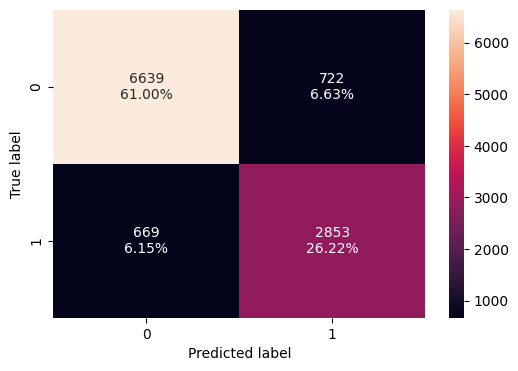

In [103]:
confusion_matrix_sklearn(model, X_test, y_test)

In [104]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87219,0.81005,0.79804,0.80400


**Observations**
* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfitting. Hence it needs to be pruned.

**Before pruning the tree let's check the important features.**

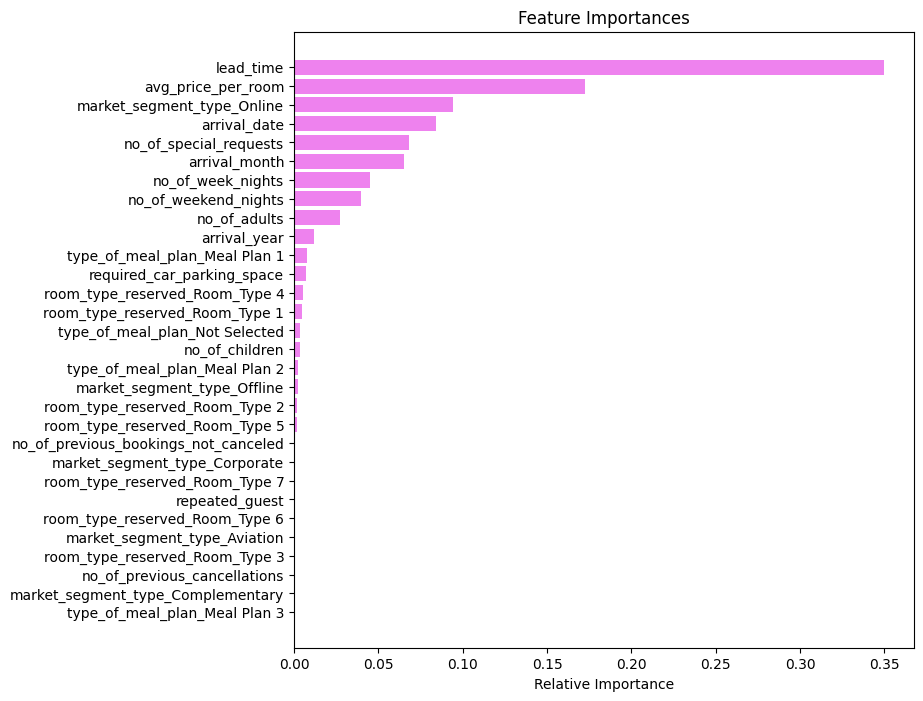

In [105]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Lead_time is the most important variable for predicting the cancellation.

**Pre-pruning**

In [106]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

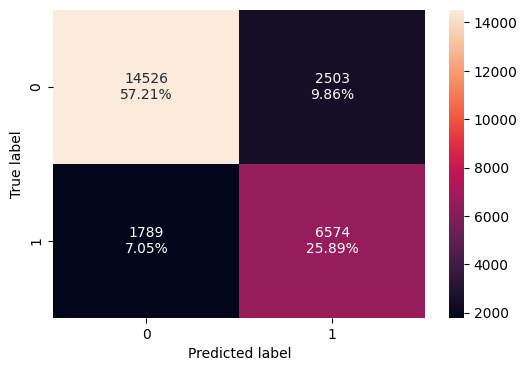

In [107]:
confusion_matrix_sklearn(estimator,X_train,y_train)

In [108]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
     estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


#### Checking performance on test set


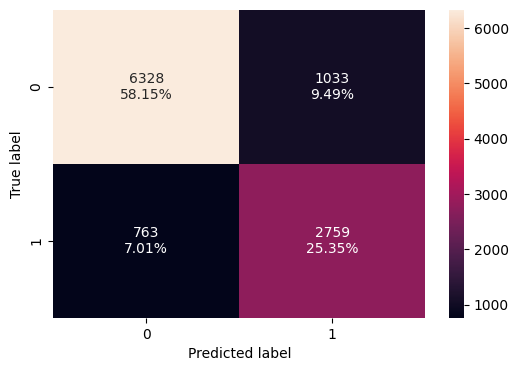

In [109]:
confusion_matrix_sklearn(estimator,X_test,y_test)

In [110]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
     estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


* The model is giving a generalized result now since the F1 scores on both the train and test data are coming to be around 0.75 which shows that the model is able to generalize well on unseen data.

#### Visualizing the Decision Tree

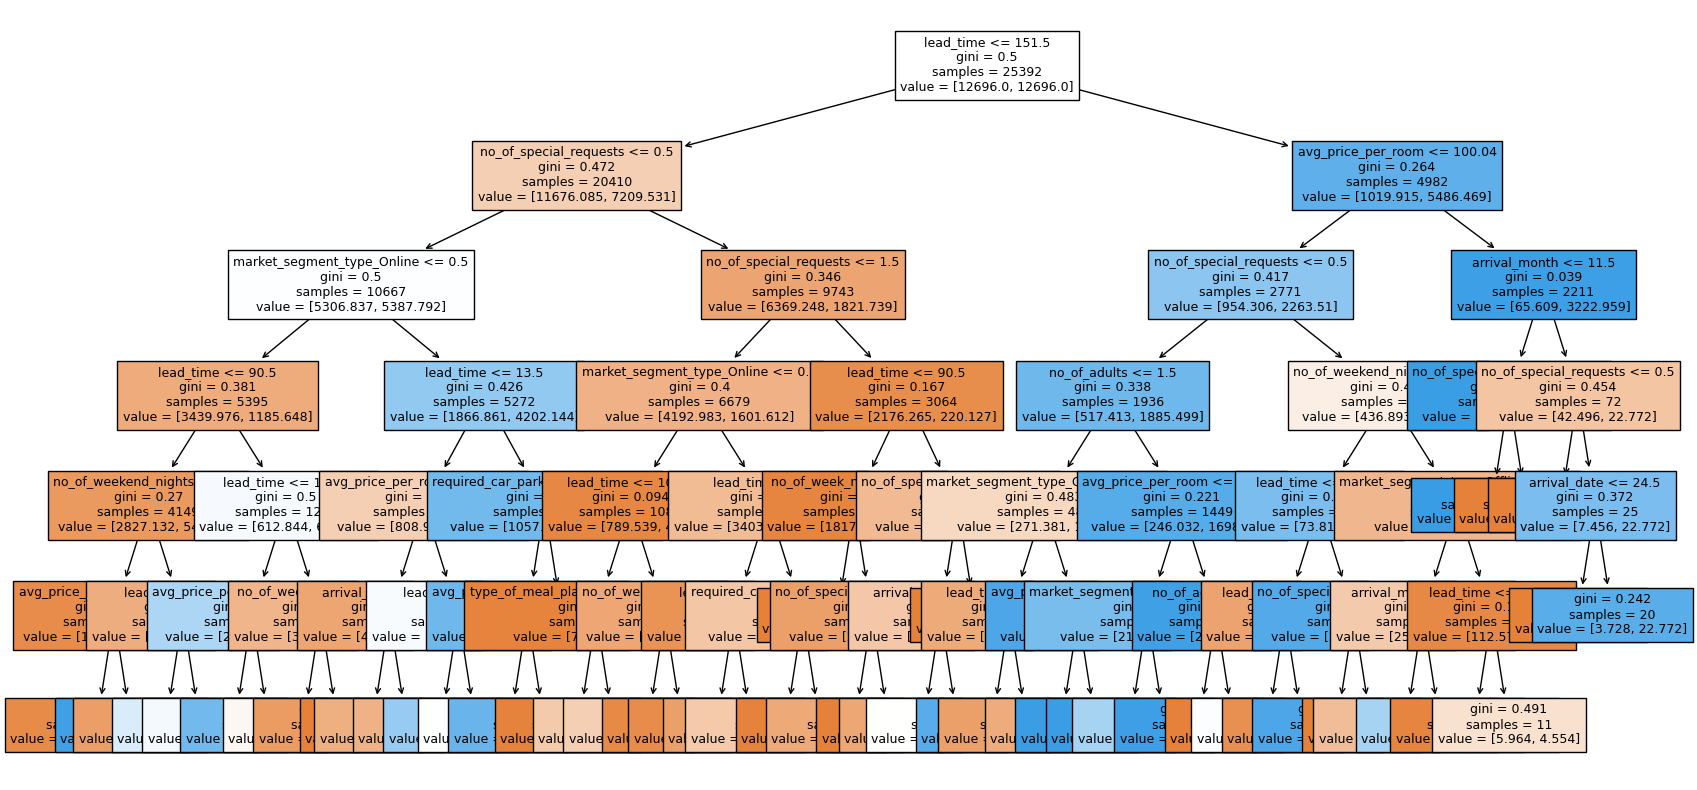

In [111]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [112]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.50, the no_of_special_requests is less than or equal to 0.5, the market_segment_type is less than or equal to 0.5 the booking is likely to be canceled

`Interpretations from other decision rules can be made similarly`

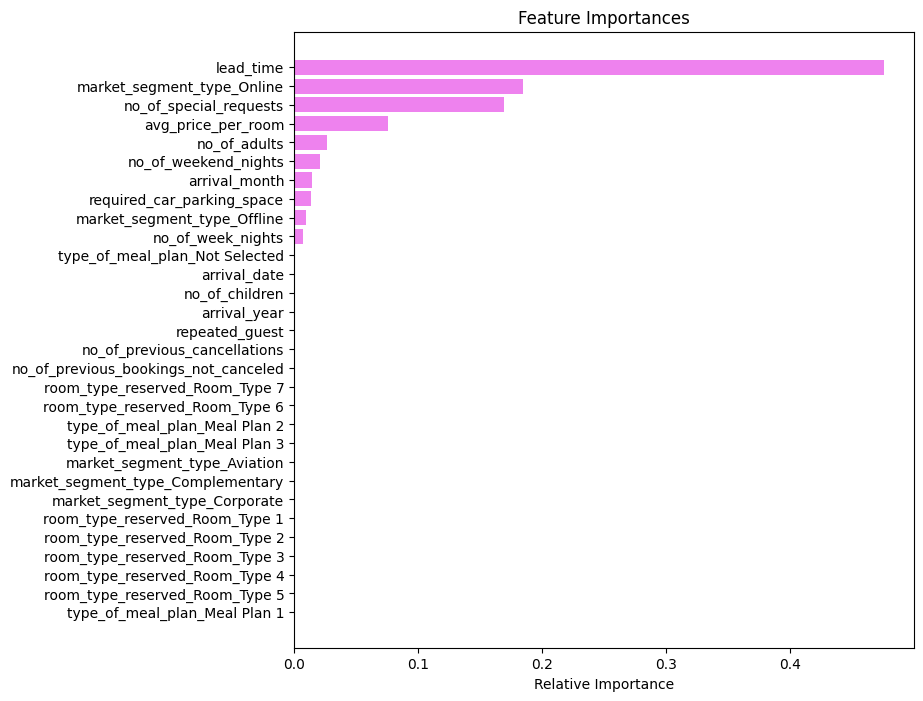

In [113]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre-pruned decision tree, lead time and market_segment_type_online are the most important features.

**Cost Complexity Pruning**

In [114]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [115]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1848,0.00890,0.32806
1849,0.00980,0.33786
1850,0.01272,0.35058
1851,0.03412,0.41882


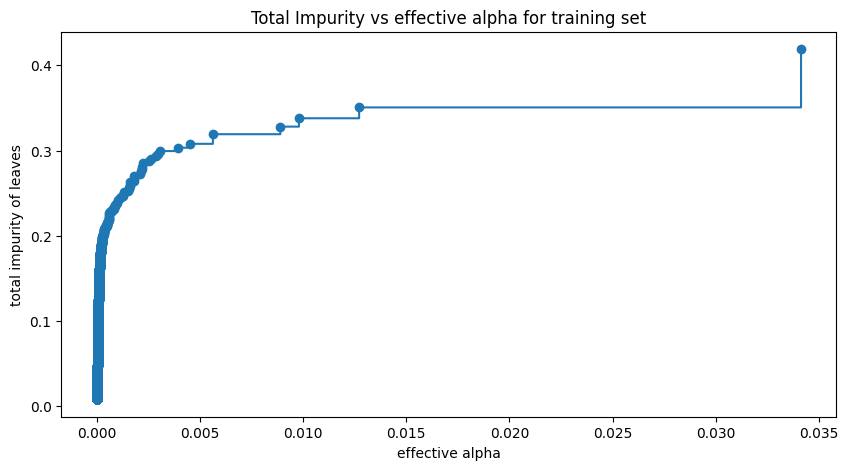

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [117]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137071


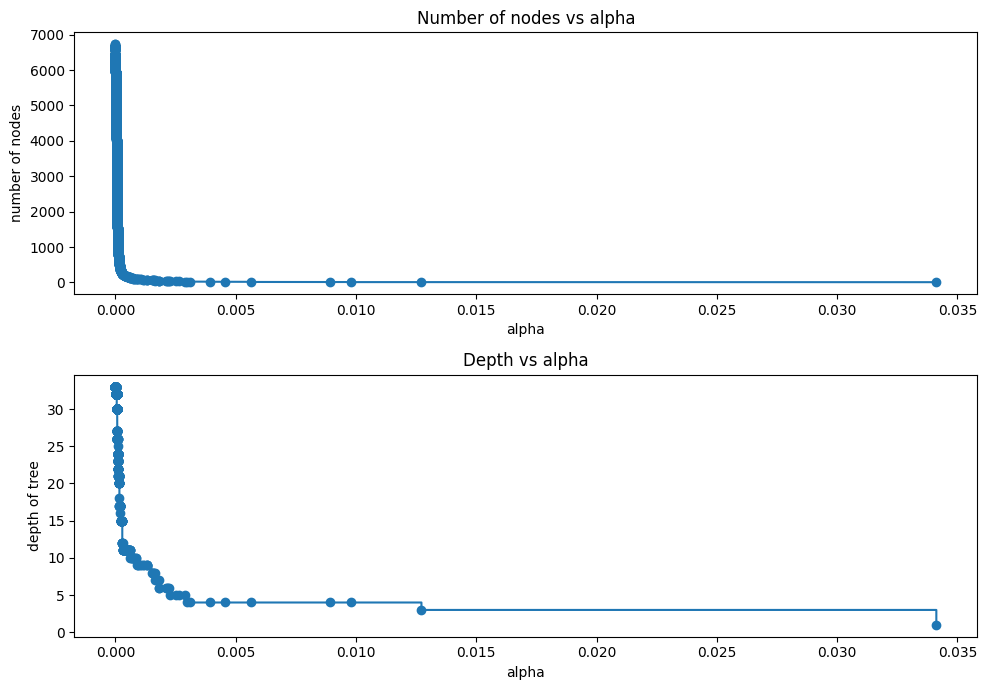

In [118]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

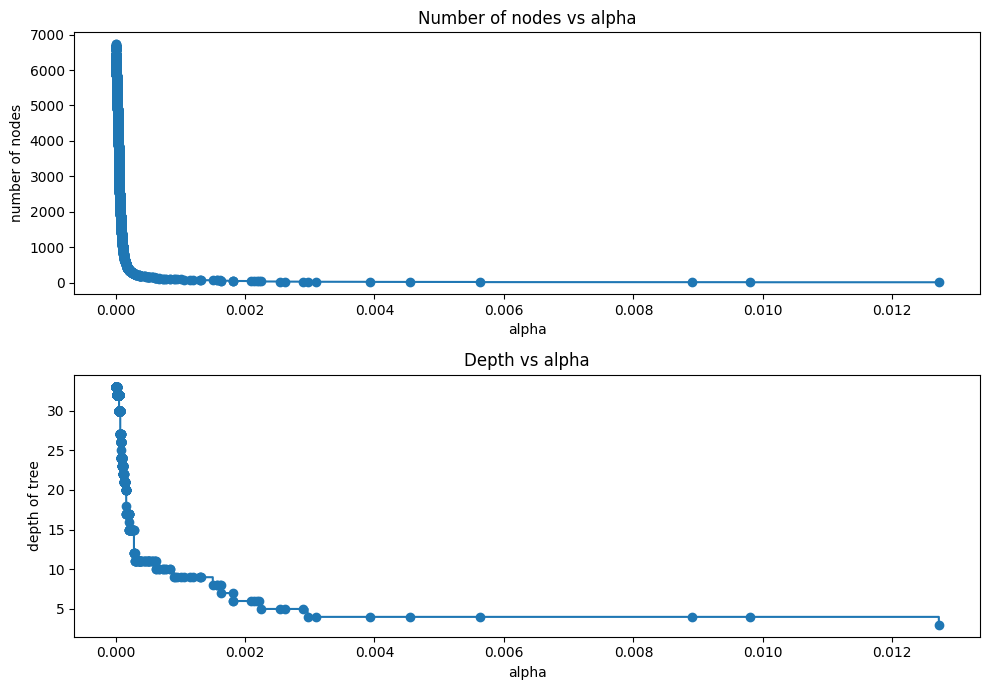

In [119]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [120]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

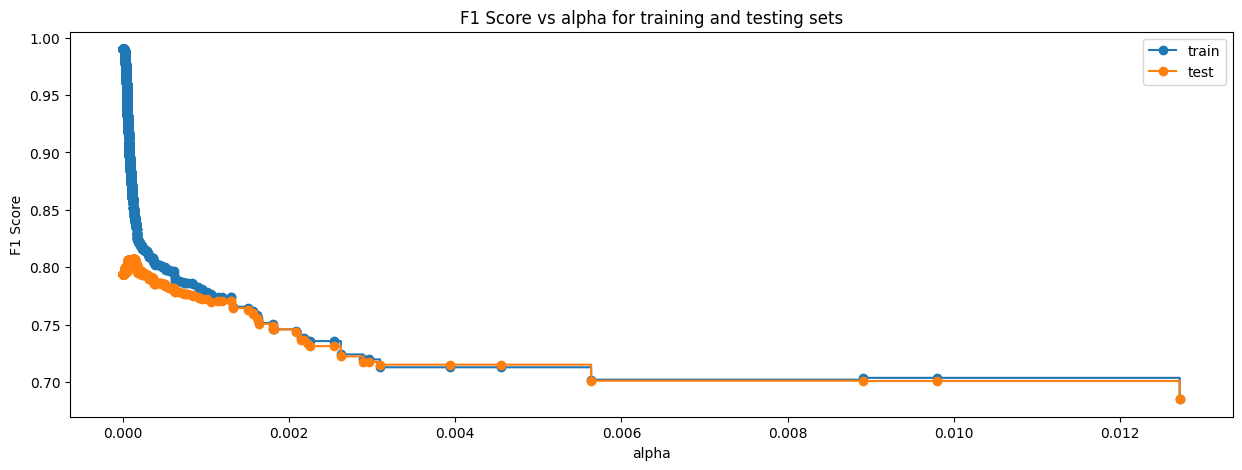

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [122]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013338844575845144,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

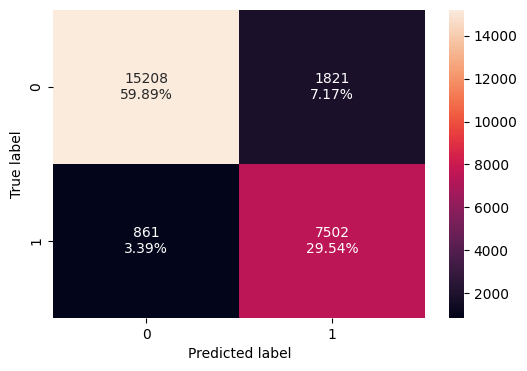

In [123]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [124]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89438,0.89705,0.80468,0.84835


#### Checking performance on test set

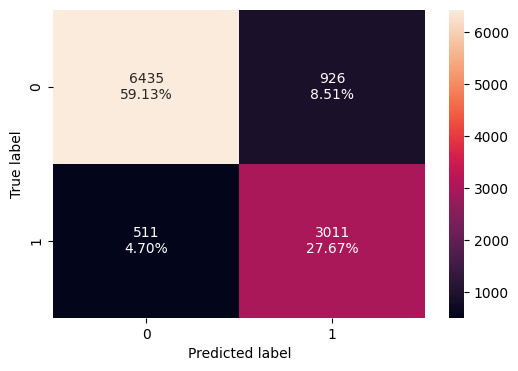

In [125]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [126]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86796,0.85491,0.76480,0.80735


**Observations**
* In the post-pruned tree also, the model is giving a generalized result since the F1 scores on both the train and test data are coming to be around 0.85 and 0.81 respectively, which shows that the model is able to generalize well on unseen data.

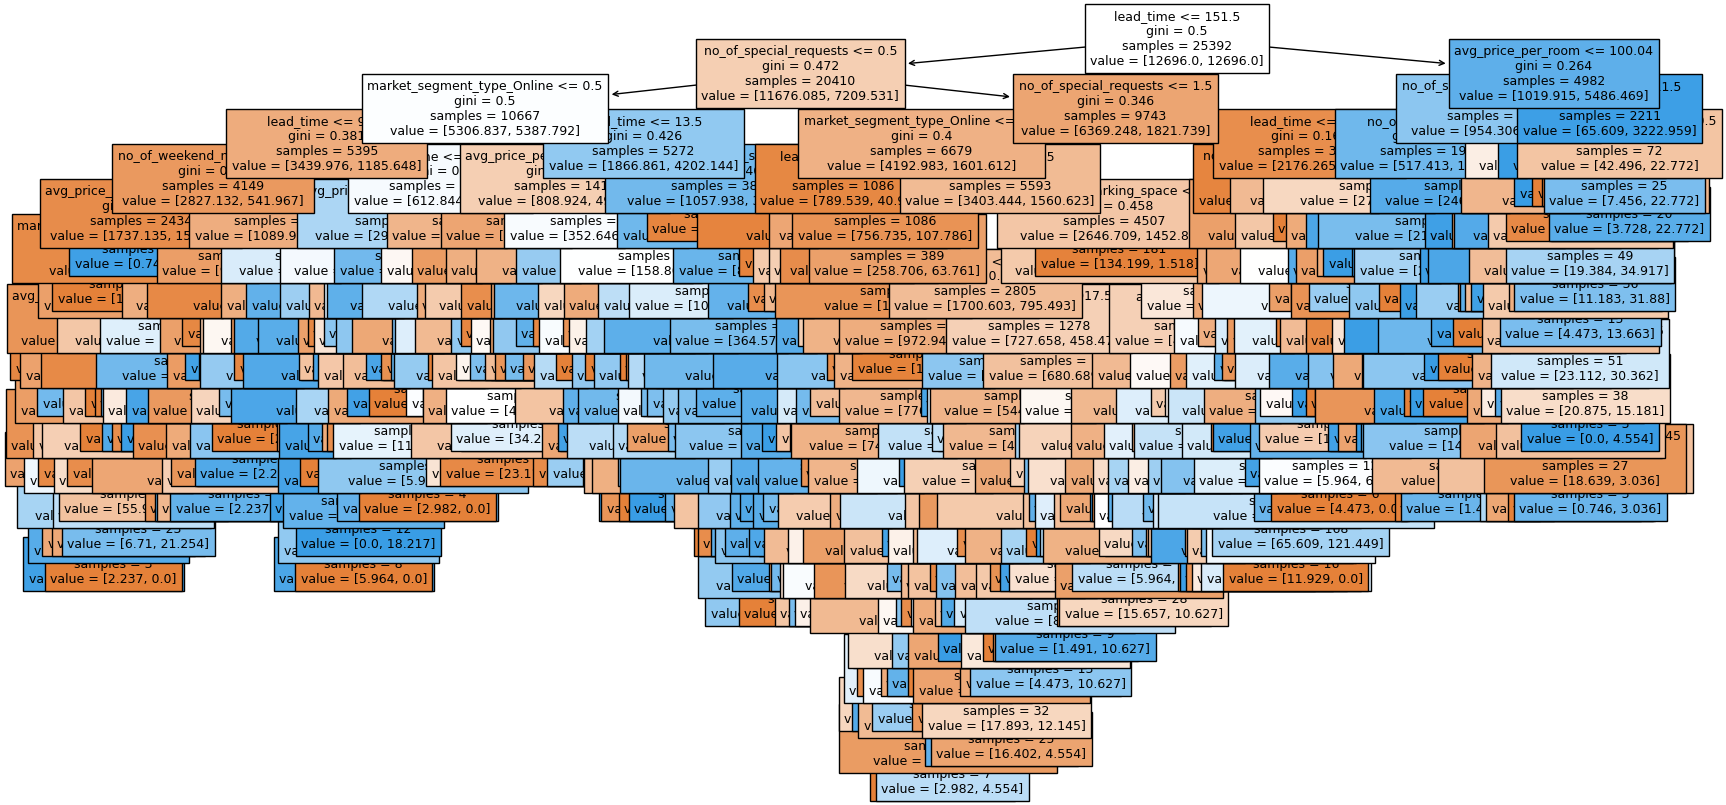

In [127]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

**Observations**
- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

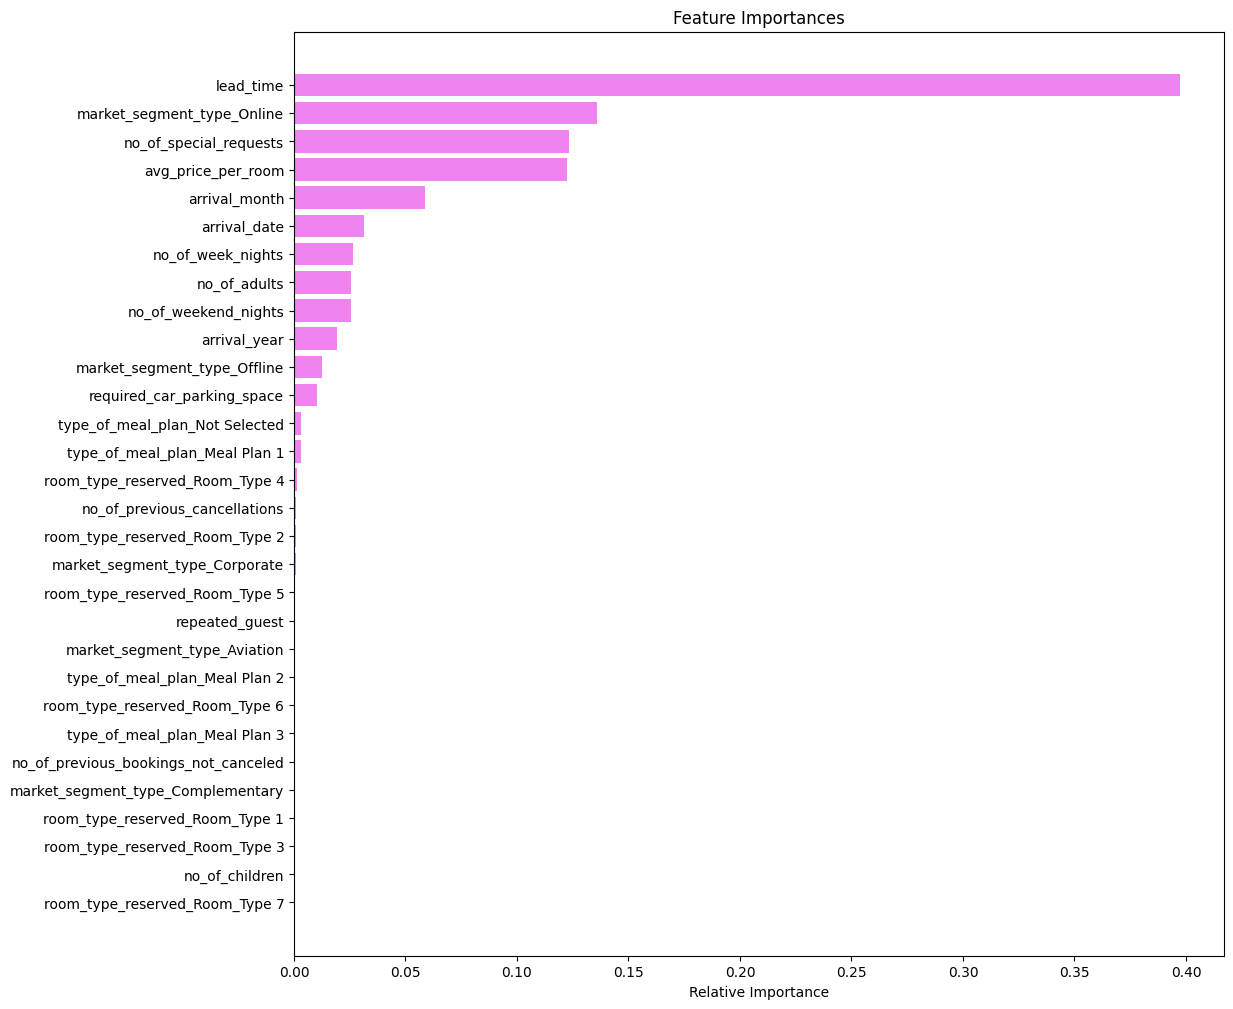

In [129]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations
* Lead time, market_segment_type_Online are the two most important features.
* no_of_special_requests,avg_price_per_room follow as important features too

In [130]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89438
Recall,0.98661,0.78608,0.89705
Precision,0.99578,0.72425,0.80468
F1,0.99117,0.75390,0.84835


#### Comparing Decision Tree models

In [131]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89438
Recall,0.98661,0.78608,0.89705
Precision,0.99578,0.72425,0.80468
F1,0.99117,0.75390,0.84835


In [132]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87219,0.83497,0.86796
Recall,0.81005,0.78336,0.85491
Precision,0.79804,0.72758,0.76480
F1,0.80400,0.75444,0.80735


* Decision tree models with pre-pruning and post-pruning both are giving equally high F1 scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high F1 score on the train and test sets than the pre-pruned tree. 

## Conclusions

 The model built can be used to predict if a machine is going to fail or not and can correctly identify 80.7% of the cancellations

- Lead time, market_segment_type_online, no_of_special_requests,avg_price_per_room are the 4 most important variables in predicting whether a booking will be cancelled or not
- From the decision tree, it has been observed that If the lead time is less than or equal to 151.50, the no_of_special_requests is less than or equal to 0.5, the market_segment_type is less than or equal to 0.5 the booking is likely to be canceled.
   * INNS Hotels should be more vigilant on these values inorder to predict bookings likely to be cancelled

## Actionable Insights and Recommendations
 From both the logistic regression and Decision tree models

**Insights**
1. Lead time, market_segment_type_online, no_of_special_requests,avg_price_per_room are the four most important features in determining whether a booking will be cancelled or not.

2. Coefficient of no_of_adults,no_of_children,no_of_weekend_nights,lead_time,arrival_year,no_of_previous_cancellations, avg_price_per_room and types of meal plan are positive and an increase in these increases chances of cancellations.

3. Coefficient of required_car_parking_space,  types of rooms, market segment types, arrival month, repeated_guest, number of special requests are negative increase in these will lead to decrease in chances of cancellations.

**Recommendations**

1.  INNS hotel should promote policies that encourage customers to book closer to their arrival dates.
2. INNS Hotel should find out what makes customers booking through online market segment have a higher probability of cancellation compared to those from other market segments by asking for feedback when a cancellation is made.
3. Inns Hotel should promote fair market prices to reduce chances of cancellations or do a market survey to determine best prices.
4. The customers with special requests also tend to cancel their bookings, they should aim to satisfy these requests as much as possible to reduce cancellations
5. Repeat guests are less likely to cancel their bookings and INNS Hotels should probably promote policies that provide incentives to repeat customers.


